**Updated on:** 2022-10-23 23:10:05 CEST

This Notebook is used for cleaning the feature table, an output of metabolomics experiment, then performing some preliminary univariate and multivariate statistics analyses.

**Authors**: Abzer Kelminal (abzer.shah@uni-tuebingen.de), Francesco Russo (frru@ssi.dk), Filip Ottosson (faot@ssi.dk), Madaleine Ernst (maet@ssi.dk) <br>
**Input file format**: .csv files or .txt files <br>
**Outputs**: .csv files, .pdf & .svg images  <br>
**Dependencies**: tidyverse, vegan, IRdisplay, svglite, factoextra, ggrepel, ggsci, matrixStats, ComplexHeatmap, dendextend, NbClust

---
This Notebook can be run with both Jupyter Notebook & Google Colab. To know more about how to get the Jupyter Notebook running with R code, please have a look at this document: [GitHub Link](https://github.com/Functional-Metabolomics-Lab/Jupyter-Notebook-Installation/blob/main/Anaconda%20with%20R%20kernel%20installation.pdf)

---
**Before starting to run this notebook with your own data, remember to save a copy of this notebook in your own Google Drive! Do so by clicking on File --> Save a copy in Drive. You can give whatever meaningful name to your notebook.** This file should be located in a new folder of your Google Drive named 'Colab Notebooks'. You can also download this notebook: File --> Download --> Download .ipynb.<br>

---
<b><font size=3> SPECIAL NOTE: Please read the comments before proceeding with the code and let us know if you run into any errors and if you think it could be commented better. We would highly appreciate your suggestions and comments!!</font> </b>

---

# **About the Data**

The files used in this tutorial are part of an interlab comparison study, where different laboratories around the world analysed the same environmental samples on their respective LC-MS/MS equipments. To simulate algal bloom, standardized algae extracts (A) in marine dissovled organic matter (M) at different concentrations were prepared (450 (A45M); 150 (A15M); and 50 (A5M) ppm A). Samples were then shipped to different laboratories for untargeted LC-MS/MS metabolomics analysis. The data used particularly for this notebook is from Lab 1 (Dorrestein Lab, University of California at San Diego, USA; Data submitted by Allegra Aron allegra.aron@gmail.com ) <br><br>
(*To be edited*) In this tutorial, we are working with one of the datasets, which was acquired on a UHPLC system coupled to a Thermo Scientific Q Exactive HF Orbitrap LC-MS/MS mass spectrometer. MS/MS data were acquired in data-dependent acquisition (DDA) with fragmentation of the five most abundant ions in the spectrum per precursor scan. Data files were subsequently preprocessed using [MZmine3](http://mzmine.github.io/) and the [feature-based molecular networking workflow in GNPS](https://gnps.ucsd.edu/ProteoSAFe/status.jsp?task=d207c3a831264d61810ad69ac09b14e9).

# **About the different sections in the Notebook:**
### **1. Data-cleaning**

It involves cleaning the feature table, which contains all the features (metabolites, in our case) with their corresponding intensities. The data cleanup steps involved are: 1) Blank removal 2) Imputation 3) Normalisation. Each step would be discussed in detail later. Once the data is cleaned, we can then use it for further statistical analyses.

### **2. Univariate statistical analysis**

Here, we will use univariate statistical methods, such as ANOVA, to investigate whether there are differences in the levels of individual features between different time points in the dataset.

### **3. Unsupervised multivariate analyses:**
#### **i. PCoA and PERMANOVA**
Here, we will perform a Principal Coordinate Analysis (PCoA), also known as metric or classical Multidimensional Scaling (metric MDS) to explore and visualize patterns in an untargeted mass spectromtery-based metabolomics dataset. We will then assess statistical significance of the patterns and dispersion of different sample types using permutational multivariate analysis of variance (PERMANOVA).

#### **ii. Cluster Analyses and Heatmaps**
We will also perform different cluster analyses to explore patterns in the data. This will help us to discover subgroups of samples or features that share a certain level of similarity. Clustering is an example of unsupervised learning where no labels are given to the learning algorithm which will try to find patterns/structures in the input data on its own. The goal of clustering is to find these hidden patterns.<br>

Some types of cluster analyses (e.g. hierarchical clustering) are often associated with heatmaps. Heatmaps are a visual representation of the data where columns are usually samples and rows are features (in our case, different metabolic features). The color scale of heatmaps indicates higher or lower intensity (for instance, blue is lower and red is higher intensity).<br>

There are a lot of good videos and resources out there explaining very well the principle behind clustering. Some good ones are the following:<br>
- Hierarchical clustering and heatmaps: https://www.youtube.com/watch?v=7xHsRkOdVwo<br>
- K-means clustering: https://www.youtube.com/watch?v=4b5d3muPQmA
- ComplexHeatmap R package: https://jokergoo.github.io/ComplexHeatmap-reference/book/ 

# **Questions to be asked in the Statistical analysis sections**: </br>
**Univariate Statistical analysis:**
*   Are metabolite levels dependent on the dilution?
*   How does the affected metabolite change throughout the dilution series?
*   How large are the differences? 
---
**Unsupervised multivariate analyses: PCoA & PERMANOVA**
*   Can we monitor algal bloom by looking at metabolomic profiles of marine dissolved organic matter?
---
**Cluster analysis and Heatmaps**
- Can we monitor algal bloom by looking at metabolomic profiles of marine dissolved organic matter?
- Are we able to group/cluster together samples derived from different concentrations of algae extracts using metabolic profiles? <br>
- Which samples are the most similar? <br>
- Are there any patterns defining the groups/clusters? That is, which features cluster together? 

# **Package installation:**
Since we are running the notebook via Colab environment which runs completely in cloud, we need to install the packages every time we run the notebook.This might take some time to install all these packages. In case you are running the notebook directly via Jupyter Notebook IDE, you need to install the packages only once.

In [1]:
#It might take some time to install these packages: (8-10 mins)
install.packages(c("tidyverse","vegan","IRdisplay","svglite","factoextra","ggrepel")) #for data-cleanup and multivariate stats

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘xtable’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘permute’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘Rcpp’




In [2]:
install.packages(c("ggsci","matrixStats")) #univariate stats

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
#It might take some time to install these packages (2-3 mins). These are used for Clustering & Heatmaps
install.packages("BiocManager")
BiocManager::install("ComplexHeatmap")
install.packages(c("dendextend","NbClust"))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)

Installing package(s) 'BiocVersion', 'ComplexHeatmap'

also installing the dependencies ‘shape’, ‘rjson’, ‘BiocGenerics’, ‘S4Vectors’, ‘iterators’, ‘circlize’, ‘GetoptLong’, ‘clue’, ‘GlobalOptions’, ‘png’, ‘IRanges’, ‘foreach’, ‘doParallel’


Old packages: 'data.table', 'devtools', 'digest', 'jsonlite', 'openssl',
  'roxygen2', 'sys', 'tibble', 'tidyverse', 'vctrs', 'xfun', 'yaml', 'foreign',
  'mgcv', 'rpart'

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
# Calling the local libraries:
suppressPackageStartupMessages({
  library(tidyverse) #used for data science. The eight core packages inside this library are: ggplot2 (data visualisation), dplyr (data manipulation), tidyr, readr, purrr, tibble, stringr, and forcats
  library(ggrepel) #mainly used to repel overlapping text labels in ggplots
  library(vegan) #popular library for analysing ecological diversity and for multivariate analysis of community data. Here, we use it for PCoA
  library(IRdisplay) #better display of output cells in Jupyter Notebooks running iwth IRKernel. Library not needed when running the script in RStudio
  library(svglite) #to save the plots in support vector graphics (svg) format
  library(factoextra) #for extracting and visualizing outputs of multivariate analyses such as PCA, k-means
  library(ggsci) #provides color palettes for ggplot2 that can be used for scientific journals
  library(matrixStats) #contains highly optimized functions to perform statistics on matrix data
  library(ComplexHeatmap) #for visualising heatmaps
  library(dendextend) # for getting dendograms
  library(NbClust) # for finding the optimum no.of clusters to be used for a clustering method
})

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [81]:
#Global settings for plot size in the output cell:
options(repr.plot.width=8, repr.plot.height=8,res=600) #For google collab

# **Setting a local working directory:**
### For Google Colab Users:
<p style='text-align: justify;'> <font color='red'>For Google Colab, it is not possible to access the files from your local computer as it is hosted on Google's cloud server. An easier workaround is to upload the necessary files into the Google colab session using the 'Files' icon on the left as shown in the image. The code in the next cell creates a new folder 'My_TestData' in the Colab space and sets the folder as working directory. Following the steps in the image, you can check in your Colab to see if the folder has been created. Once you see it, simply upload the files from your local PC to the folder 'My_TestData' and then continue running the rest of the script.</font> </p>

<p style='text-align: justify;'><b>SPECIAL NOTE: All the files uploaded to Google Colab would generally disappear after 12 hours. Similarly, all the outputs would be saved only in the Colab, so we need to download them into our local system at the end of our session.</b></p> 

[Go to section: Getting outputs from Colab](#colab_output) 

**Importing files into Google Colab environment:**
![Google-Colab Files Upload](https://github.com/abzer005/Images-for-Jupyter-Notebooks/blob/main/StepsAll.png?raw=true)

In [6]:
#Setting a working directory in Google Colab:
dir.create("/content/My_TestData", showWarnings = TRUE, recursive = FALSE, mode = "0777")
setwd("/content/My_TestData")

In [7]:
# Creating a Result folder
dir.create(path=paste(getwd(), "_Workflow_Results", sep=""), showWarnings = TRUE)
fName <-paste(getwd(), "_Workflow_Results", sep="")

In [8]:
getwd() #to see the working directory 

[1] "/content/My_TestData"

**For users running the script directly in Jupyter Notebook instead through Google Colab**, please make sure to include all the input files in one folder before running the script. Then for setting the working directory, use the below code on a new cell. When you run the cell, it will display an output box where you can enter the path of the folder containing all your input files in your local computer and it will set as your working directory<br> For ex: D:\User\Project\Test_Data

```
Directory <- normalizePath(readline("Enter the path of the folder with input files: "),"/",mustWork=FALSE)
setwd(Directory)
```



# **Input files needed for the Notebook:**
1) <b>Feature table:</b> An output of metabolomics experiment, containing all the features or peaks (LC-MS/MS peaks here) with their corresponding intensities. The feature table used in the test data is obtained by MZmine3. (Filetype: .csv file) </br> 
2) <b>Metadata:</b> Created by the user about the files used obtaining the feature table (It can be a csv/txt/tsv file). The columns in a metadata should be created with the following format: filename (1st column having all the filenames in the same order as the columns in feature table), all the other columns with column name such as: ATTRIBUTE_yourDesiredAttribute. </br>

Please have a look at the metadata used here for reference. Creating a metadata in the above-mentioned format is necessary for uploading the files in GNPS and to obtain a molecular network.

## Reading the input data using URL:
Here, we can directly pull the data files from our Functional Metabolomics GitHub page:

In [7]:
#Reading the input data using URL 
ft_url <- 'https://raw.githubusercontent.com/Functional-Metabolomics-Lab/Statistical-analysis-of-non-targeted-LC-MSMS-data/main/Data/Lab_1_data/Lab1_GNPS_file_quant.csv'
md_url <- 'https://raw.githubusercontent.com/Functional-Metabolomics-Lab/Statistical-analysis-of-non-targeted-LC-MSMS-data/main/Data/Lab_1_data/metadata_dom_interlab_lab1.txt'

Or you can simply right-click on the files you uploaded into 'My_TestData' folder,copy the file path and paste in the cell below:

In [9]:
ft_url <-"/content/My_TestData/Lab1_GNPS_file_quant.csv"
md_url <- "/content/My_TestData/metadata_dom_interlab_lab1.txt"

In [10]:
ft <- read.csv(ft_url, header = T, check.names = F)
md <- read.csv(md_url, header = T, check.names = F, sep = '\t',row.names = 1)

Lets check if the data has been read correclty!!

In [11]:
head(ft) # gets the first 6 rows of ft
dim(ft) #gets the dimension (number of rows and columns) of ft

,row ID,row m/z,row retention time,row ion mobility,row ion mobility unit,row CCS,correlation group ID,annotation network number,best ion,auto MS2 verify,⋯,DOM_Interlab-LCMS_Lab1_A45M_Pos_MS2_rep2.mzML Peak area,DOM_Interlab-LCMS_Lab1_M_Pos_MS2_rep1.mzML Peak area,DOM_Interlab-LCMS_Lab1_M_Pos_MS2_rep2.mzML Peak area,DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep1.mzML Peak area,DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep2.mzML Peak area,DOM_Interlab-LCMS_Lab1_A45M_Pos_MS2_rep3.mzML Peak area,DOM_Interlab-LCMS_Lab1_A5M_Pos_MS2_rep3.mzML Peak area,DOM_Interlab-LCMS_Lab1_M_Pos_MS2_rep3.mzML Peak area,DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep3.mzML Peak area,
,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,834,150.1277,1.0516550,NA,NA,NA,NA,NA,NA,NA,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NA
2,1458,150.1278,3.1935270,NA,NA,NA,NA,NA,NA,NA,⋯,73032.68,89184.16,0.00,175378.06,63048.62,86292.55,69219.23,174635.88,35095.74,NA
3,1418,150.1278,3.1726594,NA,NA,NA,NA,NA,NA,NA,⋯,179107.34,182752.95,202764.25,91746.70,168632.83,182786.73,170407.94,100635.78,190752.25,NA
4,30,151.0352,0.6531554,NA,NA,NA,NA,NA,NA,NA,⋯,245133.69,249818.03,227996.84,223716.30,221928.16,250871.08,245521.73,261982.14,244421.44,NA
5,991,151.0353,1.3121305,NA,NA,NA,NA,NA,NA,NA,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NA
6,7137,151.0754,6.0022780,NA,NA,NA,NA,NA,NA,NA,⋯,44900.08,73358.59,55780.67,89922.16,90066.02,37633.26,61488.17,74299.41,93198.79,NA


[1] 3726   27

In [12]:
head(md)
dim(md)

,ATTRIBUTE_Sample,ATTRIBUTE_Sample_Type,ATTRIBUTE_Time-Point
,<chr>,<chr>,<int>
DOM_Interlab-LCMS_Lab1_A5M_Pos_MS2_rep1.mzML,A5M,Sample,5
DOM_Interlab-LCMS_Lab1_A5M_Pos_MS2_rep2.mzML,A5M,Sample,5
DOM_Interlab-LCMS_Lab1_A5M_Pos_MS2_rep3.mzML,A5M,Sample,5
DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep1.mzML,A15M,Sample,15
DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep2.mzML,A15M,Sample,15
DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep3.mzML,A15M,Sample,15


[1] 13  3

## **Creating Functions:**
<p style='text-align: justify;'> Before getting into the Data cleanup steps, we have created a function that can be used later for data summarization. By creating functions, we don't have to write these big codes multiple times. Instead, we just use the function name. <font color="red">The following cell in this section will not produce any outputs here. </font> The outputs will be produced when we give input variables to the function in the later sections. </p>

<p style='text-align: justify;'> Using this function InsideLevels, we get an idea of the multiple levels in each of the metioned attributes in the metadata as well as the datatype of each attribute.  <font color ="blue"> This function takes metadata table as its input. </font></p>

In [51]:
#Function: InsideLevels
 InsideLevels <- function(metatable){
    LEVELS <- c()
    typ<-c()
    COUNT <- c()
    for(i in 1:ncol(metatable)){
      temp <- as.data.frame(table(metatable[,i]))
      x <- temp$Var1 #getting the name of each level in every column
      if(is.double(metatable[,i])==T){x=round(as.double(x),2)}
      LEVELS <- rbind(LEVELS,toString(x))
      COUNT <- rbind(COUNT,toString(temp$Freq)) # getting the frequency of each level in every column
      typ <- rbind(typ,class(metatable[,i])) # getting the class of each column
    }
    out <- data.frame(INDEX=c(1:ncol(metatable)),ATTRIBUTES=colnames(metatable),LEVELS,COUNT,'ATTRIBUTE_CLASS'=typ,row.names=NULL)
    return(out)
  }

First, let's have a look at the different conditions within each attribute of our metadata.

In [53]:
InsideLevels(md)

INDEX,ATTRIBUTES,LEVELS,COUNT,ATTRIBUTE_CLASS
<int>,<chr>,<chr>,<chr>,<chr>
1,ATTRIBUTE_Sample,"A15M, A45M, A5M, M, PPL","3, 3, 3, 3, 1",character
2,ATTRIBUTE_Sample_Type,"Process_Blank, Sample","1, 12",character
3,ATTRIBUTE_Time-Point,"0, 5, 15, 45","3, 3, 3, 3",integer


The above table is a summary of our metadata tabel. For example, the 1st row says that there are 5 different types of sample under 'ATTRIBUTE_Sample' category namely A15M,A45M,A5M,M,PPL and the count of each of these types is g

# **Arranging metadata and feature table in the same order:**

<p style='text-align: justify;'> In the next cell, we are trying to bring the feature table and metadata in the correct format such as <font color ="green"> the rownames of metadata and column names of feature table are the same. </font> They both are the file names and they need to be the same, as from now on, we will call the columns in our feature table based on our metadata information. Thus, using the metadata, the user can filter their data easily. You can also directly deal with your feature table without metadata by getting your hands dirty with some coding!! But having a metadata improves the user-experience greatly. </p>

In [54]:
new_ft <- ft #storing the files under different names to preserve the original files
new_md <- md

colnames(new_ft) <- gsub(' Peak area','',colnames(new_ft)) #Removing Peak area extensions from the column names of ft
new_md <- new_md[,colSums(is.na(new_md))<nrow(new_md)] #Removing if any NA columns present in the md file
rownames(new_md) <- trimws(rownames(new_md), which = c("both")) #remove the (front & tail) spaces, if any present, from the rownames of md
rownames(new_ft) <- paste(new_ft$'row ID',round(new_ft$'row m/z',digits = 3),round(new_ft$'row retention time',digits = 3), sep = '_') #Changing the row names of the files
new_ft <- new_ft[,grep('mzML',colnames(new_ft))] #Picking only the files with column names containing 'mzML'

In [55]:
new_ft<- new_ft[,order(colnames(new_ft)),drop=F] #ordering the ft by its column names
new_md <-new_md[order(rownames(new_md)),,drop=F] #ordering the md by its row names

In [56]:
# how many files in the metadata are also present in the feature table
table(rownames(new_md) %in% colnames(new_ft))


TRUE 
  13 

The output says that all 13 files are present in both new_md & new_ft. If the above line returns FALSE, it means few files are missing and we can get the names of the missing files by running the next cell. However, in our case, the next cell would return nothing. 

In [18]:
# which file names in the metadata are not in the feature table?
setdiff(rownames(new_md),colnames(new_ft))

character(0)

In [19]:
#new_md <- new_md[rownames(new_md) %in% colnames(new_ft),,drop=F] # picking only the rows in new_md that are present in the column names of new_ft
#new_ft <- new_ft[,colnames(new_ft) %in% rownames(new_md),drop=F] # picking only the columns in new_ft that are the same as the rownames in new_md

In [20]:
#checking the dimensions of our new ft and md:
cat("The number of rows and columns in our original ft is:",dim(ft),"\n")
cat("The number of rows and columns in our new ft is:",dim(new_ft),"\n")
cat("The number of rows and columns in our new md is:",dim(new_md))

The number of rows and columns in our original ft is: 3726 27 
The number of rows and columns in our new ft is: 3726 13 
The number of rows and columns in our new md is: 13 3

Notice that the number of columns of feature table is same as the number of rows in our metadata. Now, we have both our feature table and metadata in the same order.

In [57]:
#checking if they the files are in the same order
identical(colnames(new_ft),rownames(new_md))

[1] TRUE

Lets check the files once again!!

In [58]:
head(new_ft)
dim(new_ft)

,DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep1.mzML,DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep2.mzML,DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep3.mzML,DOM_Interlab-LCMS_Lab1_A45M_Pos_MS2_rep1.mzML,DOM_Interlab-LCMS_Lab1_A45M_Pos_MS2_rep2.mzML,DOM_Interlab-LCMS_Lab1_A45M_Pos_MS2_rep3.mzML,DOM_Interlab-LCMS_Lab1_A5M_Pos_MS2_rep1.mzML,DOM_Interlab-LCMS_Lab1_A5M_Pos_MS2_rep2.mzML,DOM_Interlab-LCMS_Lab1_A5M_Pos_MS2_rep3.mzML,DOM_Interlab-LCMS_Lab1_M_Pos_MS2_rep1.mzML,DOM_Interlab-LCMS_Lab1_M_Pos_MS2_rep2.mzML,DOM_Interlab-LCMS_Lab1_M_Pos_MS2_rep3.mzML,DOM_Interlab-LCMS_Lab1_PPL_blank_Pos_MS2.mzML
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
834_150.128_1.052,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,81619.78
1458_150.128_3.194,175378.06,63048.62,35095.74,76711.62,73032.68,86292.55,160484.12,90376.30,69219.23,89184.16,0.00,174635.88,0.00
1418_150.128_3.173,91746.70,168632.83,190752.25,155348.86,179107.34,182786.73,0.00,180862.78,170407.94,182752.95,202764.25,100635.78,0.00
30_151.035_0.653,223716.30,221928.16,244421.44,216268.95,245133.69,250871.08,227419.23,234767.06,245521.73,249818.03,227996.84,261982.14,0.00
991_151.035_1.312,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,98517.07
7137_151.075_6.002,89922.16,90066.02,93198.79,44915.14,44900.08,37633.26,49160.88,65025.47,61488.17,73358.59,55780.67,74299.41,0.00


[1] 3726   13

In [59]:
head(new_md)
dim(new_md)

,ATTRIBUTE_Sample,ATTRIBUTE_Sample_Type,ATTRIBUTE_Time-Point
,<chr>,<chr>,<int>
DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep1.mzML,A15M,Sample,15
DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep2.mzML,A15M,Sample,15
DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep3.mzML,A15M,Sample,15
DOM_Interlab-LCMS_Lab1_A45M_Pos_MS2_rep1.mzML,A45M,Sample,45
DOM_Interlab-LCMS_Lab1_A45M_Pos_MS2_rep2.mzML,A45M,Sample,45
DOM_Interlab-LCMS_Lab1_A45M_Pos_MS2_rep3.mzML,A45M,Sample,45


[1] 13  3

# Splitting the data into Blanks and Samples using Metadata:
<a id="data_split"></a>

For the first step: Blank removal, we need to split the data as spectra obtained from blanks and samples respectively using the metadata. More about Blank removal in the next section.

In [60]:
InsideLevels(new_md)

INDEX,ATTRIBUTES,LEVELS,COUNT,ATTRIBUTE_CLASS
<int>,<chr>,<chr>,<chr>,<chr>
1,ATTRIBUTE_Sample,"A15M, A45M, A5M, M, PPL","3, 3, 3, 3, 1",character
2,ATTRIBUTE_Sample_Type,"Process_Blank, Sample","1, 12",character
3,ATTRIBUTE_Time-Point,"0, 5, 15, 45","3, 3, 3, 3",integer


In case we want to remove certain files of a particular condition, for ex: ATTRIBUTE_sample = "M", we can subset them out of our dataframe using the next cell. 

In [ ]:
#new_md <- new_md %>% filter(ATTRIBUTE_sample != "M")
#InsideLevels(new_md)
#dim(new_md)

Once we subset the data, we can further proceed to split the blanks from the sample in the cell below. If no subsetting is involved, you can simply split your metadata into blank and sample.

In [62]:
#Getting the blank based on the metadata
md_Blank <- new_md %>% filter(ATTRIBUTE_Sample_Type == "Process_Blank") #filtering the rows from metadata with the condition = blank
Blank <- new_ft[,which(colnames(new_ft)%in%rownames(md_Blank)),drop=F] #getting the corresponding columns from ft

head(Blank, n=3)
dim(Blank)

,DOM_Interlab-LCMS_Lab1_PPL_blank_Pos_MS2.mzML
,<dbl>
834_150.128_1.052,81619.78
1458_150.128_3.194,0.00
1418_150.128_3.173,0.00


[1] 3726    1

In [63]:
#Getting the samples based on the metadata 
md_Samples <- new_md %>% filter(ATTRIBUTE_Sample_Type == "Sample")
Samples <- new_ft[,which(colnames(new_ft)%in%rownames(md_Samples)),drop=F] 

head(Samples, n=3)
dim(Samples)

,DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep1.mzML,DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep2.mzML,DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep3.mzML,DOM_Interlab-LCMS_Lab1_A45M_Pos_MS2_rep1.mzML,DOM_Interlab-LCMS_Lab1_A45M_Pos_MS2_rep2.mzML,DOM_Interlab-LCMS_Lab1_A45M_Pos_MS2_rep3.mzML,DOM_Interlab-LCMS_Lab1_A5M_Pos_MS2_rep1.mzML,DOM_Interlab-LCMS_Lab1_A5M_Pos_MS2_rep2.mzML,DOM_Interlab-LCMS_Lab1_A5M_Pos_MS2_rep3.mzML,DOM_Interlab-LCMS_Lab1_M_Pos_MS2_rep1.mzML,DOM_Interlab-LCMS_Lab1_M_Pos_MS2_rep2.mzML,DOM_Interlab-LCMS_Lab1_M_Pos_MS2_rep3.mzML
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
834_150.128_1.052,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0
1458_150.128_3.194,175378.1,63048.62,35095.74,76711.62,73032.68,86292.55,160484.1,90376.3,69219.23,89184.16,0.0,174635.9
1418_150.128_3.173,91746.7,168632.83,190752.25,155348.86,179107.34,182786.73,0.0,180862.8,170407.94,182752.95,202764.2,100635.8


[1] 3726   12

**Now that we have our data ready, we can start with the cleanup steps!!**

# Step1: Blank Removal

<p style='text-align: justify;'> In LC-MS/MS, we use solvents called Blanks which are usually injected time-to-time to prevent carryover of the sample. The features coming from these Blanks would also be detected by LC-MS/MS instrument. Our goal here is to remove these features from our samples. The other blanks that can be removed are: Signals coming from growth media alone in terms of microbial growth experiment, signals from the solvent used for extraction methods and so on. Therefore, it is best practice to measure mass spectra of these blanks as well in addition to your sample spectra. </p>

**How do we remove these blank features?** </br> 
<p style='text-align: justify;'> Since we have the feature table split into Control blanks and Sample groups now, we can compare blanks to the sample to identify the background features coming from blanks. A common filtering method is to use a cutoff to remove features that are not present sufficient enough in our biological samples. </p>

The steps followed in the next few cells are:
1. <p style='text-align: justify;'> We find an average for all the feature intensities in your blank set and sample set. Therefore, for n no.of features in a blank or sample set, we get n no.of averaged features. </p>
2. <p style='text-align: justify;'> Next, we get a ratio of this average_blanks vs average_sample. This ratio Blank/sample tells us how much of that particular feature of a sample gets its contribution from blanks. If it is more than 30% (or Cutoff as 0.3), we consider the feature as noise. </p>
3. <p style='text-align: justify;'> The resultant information (if ratio > Cutoff or not) is stored in a bin such as 1 = Noise or background signal, 0 = Feature Signal</p>
4. <p style='text-align: justify;'> We count the no.of features in the bin that satisfies the condition ratio > cutoff, and consider those features as 'noise or background features' and remove them. </p>

**<font color='red'> The Cutoff used to obtain the all the files in MZmine Results folder is 0.3 </font>**

In [64]:
#When cutoff is low, more noise (or background) detected; With higher cutoff, less background detected, thus more features observed
Cutoff <- as.numeric(readline('Enter Cutoff value between 0.1 & 1:')) # (i.e. 10% - 100%). Ideal cutoff range: 0.1-0.3
    
#Getting mean for every feature in blank and Samples
Avg_blank <- rowMeans(Blank, na.rm= F, dims = 1) # set na.rm = F to check if there are NA values. When set as T, NA values are changed to 0
Avg_samples <- rowMeans(Samples, na.rm= F, dims = 1)
    
#Getting the ratio of blank vs Sample
Ratio_blank_Sample <- (Avg_blank+1)/(Avg_samples+1)
    
# Creating a bin with 1s when the ratio>Cutoff, else put 0s
Bg_bin <- ifelse(Ratio_blank_Sample > Cutoff, 1, 0 )
Blank_removal <- cbind(Samples,Bg_bin)

# Checking if there are any NA values present. Having NA values in the 4 variables will affect the final dataset to be created
temp_NA_Count <-cbind(Avg_blank ,Avg_samples,Ratio_blank_Sample,Bg_bin)
print('No of NA values in the following columns:')
print(colSums(is.na(temp_NA_Count)))

#Calculating the number of background features and features present
print(paste("No.of Background or noise features:",sum(Bg_bin ==1,na.rm = T)))
print(paste("No.of features after excluding noise:",(nrow(Samples) - sum(Bg_bin ==1,na.rm = T)))) 

Blank_removal <- Blank_removal %>% filter(Bg_bin == 0) # Taking only the feature signals
Blank_removal <- as.matrix(Blank_removal[,-ncol(Blank_removal),drop=F]) # removing the last column Bg_bin 

Enter Cutoff value between 0.1 & 1:0.3
[1] "No of NA values in the following columns:"
         Avg_blank        Avg_samples Ratio_blank_Sample             Bg_bin 
                 0                  0                  0                  0 
[1] "No.of Background or noise features: 123"
[1] "No.of features after excluding noise: 3603"


In [28]:
head(Blank_removal)
dim(Blank_removal)

,DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep1.mzML,DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep2.mzML,DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep3.mzML,DOM_Interlab-LCMS_Lab1_A45M_Pos_MS2_rep1.mzML,DOM_Interlab-LCMS_Lab1_A45M_Pos_MS2_rep2.mzML,DOM_Interlab-LCMS_Lab1_A45M_Pos_MS2_rep3.mzML,DOM_Interlab-LCMS_Lab1_A5M_Pos_MS2_rep1.mzML,DOM_Interlab-LCMS_Lab1_A5M_Pos_MS2_rep2.mzML,DOM_Interlab-LCMS_Lab1_A5M_Pos_MS2_rep3.mzML,DOM_Interlab-LCMS_Lab1_M_Pos_MS2_rep1.mzML,DOM_Interlab-LCMS_Lab1_M_Pos_MS2_rep2.mzML,DOM_Interlab-LCMS_Lab1_M_Pos_MS2_rep3.mzML
1458_150.128_3.194,175378.06,63048.62,35095.74,76711.62,73032.68,86292.55,160484.12,90376.30,69219.23,89184.16,0.00,174635.88
1418_150.128_3.173,91746.70,168632.83,190752.25,155348.86,179107.34,182786.73,0.00,180862.78,170407.94,182752.95,202764.25,100635.78
30_151.035_0.653,223716.30,221928.16,244421.44,216268.95,245133.69,250871.08,227419.23,234767.06,245521.73,249818.03,227996.84,261982.14
7137_151.075_6.002,89922.16,90066.02,93198.79,44915.14,44900.08,37633.26,49160.88,65025.47,61488.17,73358.59,55780.67,74299.41
6905_151.075_5.937,101775.16,104670.17,107405.55,53007.94,51043.58,68598.52,79641.20,73830.05,80961.45,97414.86,159626.53,95220.12
5684_151.075_5.554,136473.77,121630.62,117858.12,46253.16,44306.28,47347.21,97025.55,84017.76,90049.81,85658.11,84897.24,106373.97


[1] 3603   12

In [38]:
write.csv(Blank_removal,file.path(fName,'Blanks_Removed.csv'),row.names =TRUE)

# Step 2: Imputation

<p style='text-align: justify;'> For several reasons, real world datasets might have some missing values in it, in the form of NA, NANs or 0s. Eventhough the gapfilling step of MZmine fills the missing values, we still end up with some missing values or 0s in our feature table. This could be problematic for statistical analysis. </p> 
<p style='text-align: justify;'> In order to have a better dataset, we cannot simply discard those rows or columns with missing values as we will lose a chunk of our valuable data. Instead we can try imputing those missing values. Imputation involves replacing the missing values in the data with a meaningful, reasonable guess. There are several methods, such as: </p> 
  
1) Mean imputation (replacing the missing values in a column with the mean or average of the column)  
2) Replacing it with the most frequent value  
3) Several other machine learning imputation methods such as k-nearest neighbors algorithm(k-NN), Hidden Markov Model(HMM)

Here, we use ft and see the frquency distribution of its features with the ggplot. It shows where the features are present in higher number.

[1] "The minimum value greater than 0 in gap-filled table: 452"


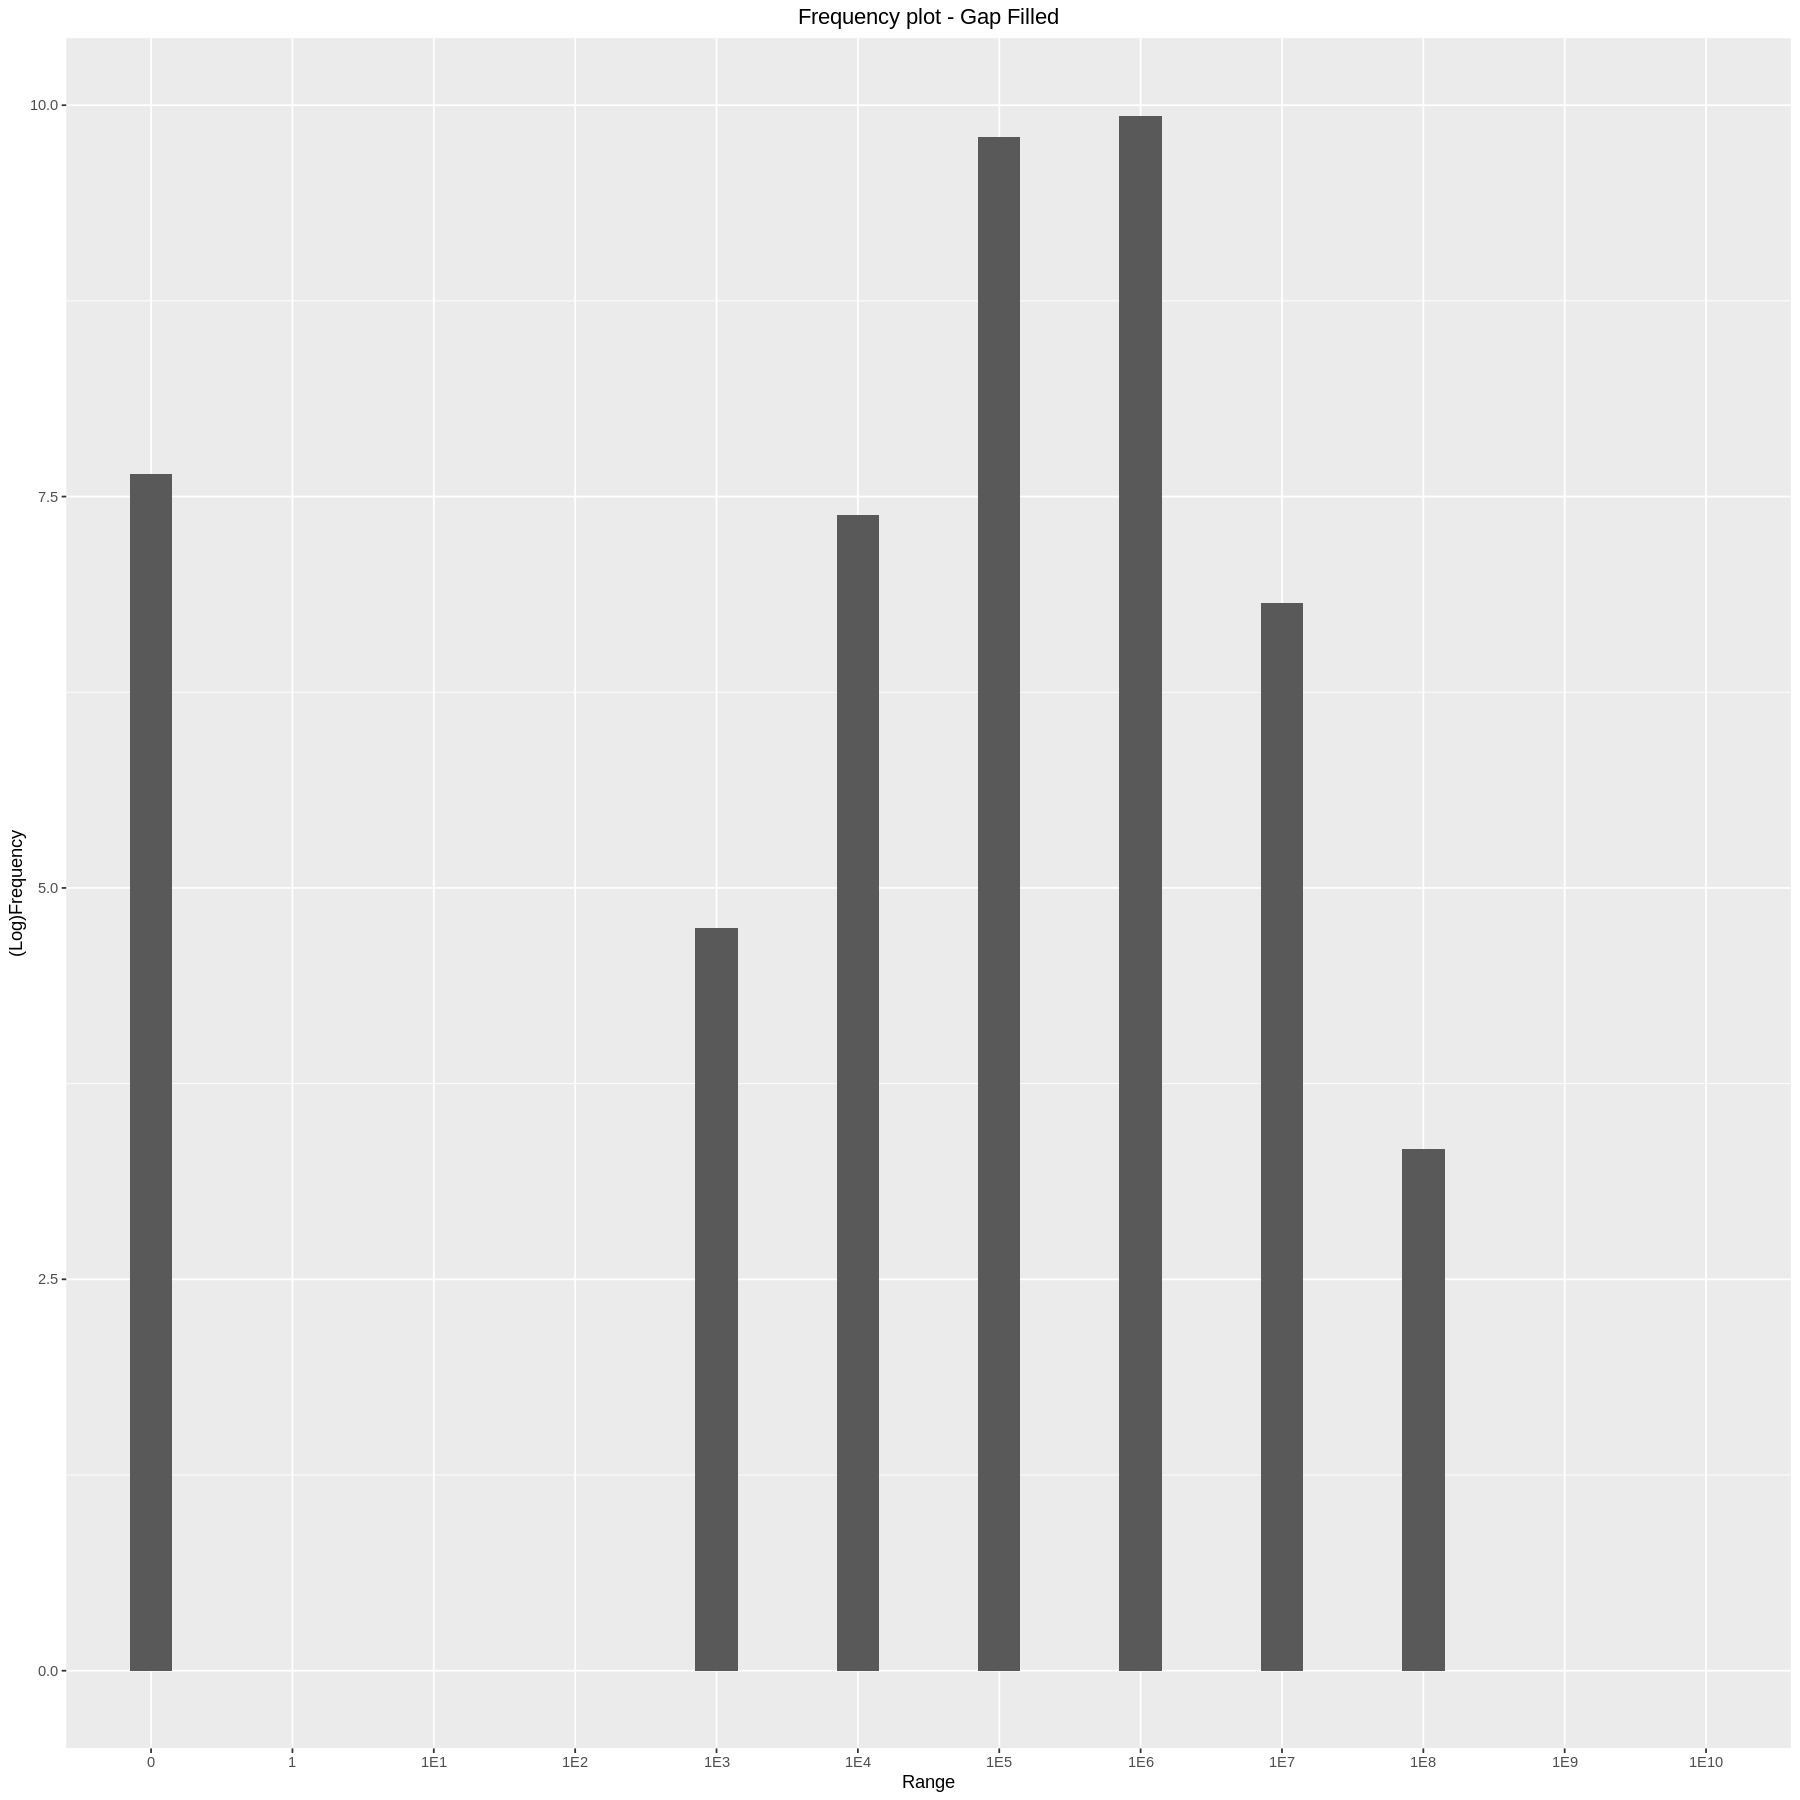

In [65]:
#creating bins from -1 to 10^10 using sequence function seq()
bins <- c(-1,0,(1 * 10^(seq(0,10,1)))) 

#cut function cuts the give table into its appropriate bins
scores_gapfilled <- cut(as.matrix(Blank_removal),bins, labels = c('0','1',paste("1E",1:10,sep="")))

#transform function convert the tables into a column format: easy for visualization
FreqTable <- transform(table(scores_gapfilled)) #contains 2 columns: "scores_x1", "Freq"
FreqTable$Log_Freq <- log(FreqTable$Freq+1) #Log scaling the frequency values
colnames(FreqTable)[1] <- 'Range_Bins' #changing the 1st colname to 'Range Bins'
#FreqTable #Uncomment the line if you want to see the FreqTable used for the following ggplot.

## GGPLOT2
ggplot(FreqTable, aes(x=Range_Bins, y=Log_Freq))+ 
    geom_bar(stat="identity",position = "dodge", width=0.3) + 
    ggtitle(label="Frequency plot - Gap Filled") +
    xlab("Range") + ylab("(Log)Frequency") + 
    theme(plot.title = element_text(hjust = 0.5))

Cutoff_LOD <- round(min(Blank_removal[Blank_removal!=min(Blank_removal)]))
print(paste0("The minimum value greater than 0 in gap-filled table: ",Cutoff_LOD)) 

In [66]:
Imputed <- Blank_removal
Imputed[Imputed <Cutoff_LOD] <- Cutoff_LOD #replacing those values < Cutoff_LOD in the Imputed table with Cutoff_LOD 
head(Imputed,n=3)
dim(Imputed)

,DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep1.mzML,DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep2.mzML,DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep3.mzML,DOM_Interlab-LCMS_Lab1_A45M_Pos_MS2_rep1.mzML,DOM_Interlab-LCMS_Lab1_A45M_Pos_MS2_rep2.mzML,DOM_Interlab-LCMS_Lab1_A45M_Pos_MS2_rep3.mzML,DOM_Interlab-LCMS_Lab1_A5M_Pos_MS2_rep1.mzML,DOM_Interlab-LCMS_Lab1_A5M_Pos_MS2_rep2.mzML,DOM_Interlab-LCMS_Lab1_A5M_Pos_MS2_rep3.mzML,DOM_Interlab-LCMS_Lab1_M_Pos_MS2_rep1.mzML,DOM_Interlab-LCMS_Lab1_M_Pos_MS2_rep2.mzML,DOM_Interlab-LCMS_Lab1_M_Pos_MS2_rep3.mzML
1458_150.128_3.194,175378.1,63048.62,35095.74,76711.62,73032.68,86292.55,160484.1,90376.3,69219.23,89184.16,452.0,174635.9
1418_150.128_3.173,91746.7,168632.83,190752.25,155348.86,179107.34,182786.73,452.0,180862.8,170407.94,182752.95,202764.2,100635.8
30_151.035_0.653,223716.3,221928.16,244421.44,216268.95,245133.69,250871.08,227419.2,234767.1,245521.73,249818.03,227996.8,261982.1


[1] 3603   12

In [41]:
write.csv(Imputed,file.path(fName,paste0('Imputed_QuantTable_filled_with_',Cutoff_LOD,'_CutOff_Used_',Cutoff,'.csv')),row.names =T)

# Step 3:Normalization
The following code performs sample-centric (column-wise) normalisation:

In [67]:
#Getting column-wise sums of the input-data
sample_sum <- colSums(Imputed, na.rm= T, dims = 1)
    
#Dividing each element of a particular column with its column sum
Normalized_data <- c()
for (i in 1:ncol(Imputed)){
  x <- Imputed[,i] / sample_sum[i]
  Normalized_data <- cbind(Normalized_data, x)
  }
colnames(Normalized_data) <- names(sample_sum)

head(Normalized_data,n=3)
  
print(paste('No.of NA values in Normalized data:',sum(is.na(Normalized_data)== T)))

,DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep1.mzML,DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep2.mzML,DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep3.mzML,DOM_Interlab-LCMS_Lab1_A45M_Pos_MS2_rep1.mzML,DOM_Interlab-LCMS_Lab1_A45M_Pos_MS2_rep2.mzML,DOM_Interlab-LCMS_Lab1_A45M_Pos_MS2_rep3.mzML,DOM_Interlab-LCMS_Lab1_A5M_Pos_MS2_rep1.mzML,DOM_Interlab-LCMS_Lab1_A5M_Pos_MS2_rep2.mzML,DOM_Interlab-LCMS_Lab1_A5M_Pos_MS2_rep3.mzML,DOM_Interlab-LCMS_Lab1_M_Pos_MS2_rep1.mzML,DOM_Interlab-LCMS_Lab1_M_Pos_MS2_rep2.mzML,DOM_Interlab-LCMS_Lab1_M_Pos_MS2_rep3.mzML
1458_150.128_3.194,0.0002338955,8.240035e-05,4.532787e-05,0.0001125837,0.0001072988,0.0001254771,2.606901e-04,0.0001442873,0.0001091388,0.0001318381,6.560964e-07,0.0002480838
1418_150.128_3.173,0.0001223593,2.203919e-04,2.463659e-04,0.0002279936,0.0002631426,0.0002657883,7.342280e-07,0.0002887505,0.0002686842,0.0002701578,2.943206e-04,0.0001429610
30_151.035_0.653,0.0002983624,2.900453e-04,3.156823e-04,0.0003174013,0.0003601478,0.0003647890,3.694194e-04,0.0003748096,0.0003871170,0.0003692980,3.309467e-04,0.0003721660


[1] "No.of NA values in Normalized data: 0"


In [68]:
dim(Normalized_data)

[1] 3603   12

In [161]:
write.csv(Normalized_data, file.path(fName,'Normalised_Quant_table.csv'),row.names =T)

All the result files would be available in the 'Result' folder within your working directory (i.e the folder path you mentioned in the beginning of the script).

# Scaling:

In [69]:
Imp_t <- t(Imputed) #transposing the imputed table
head(Imp_t, n=3)

,1458_150.128_3.194,1418_150.128_3.173,30_151.035_0.653,7137_151.075_6.002,6905_151.075_5.937,5684_151.075_5.554,4120_151.075_5.025,1306_152.071_2.961,5858_153.055_5.605,2550_153.091_4.247,⋯,90_770.851_0.705,16880_774.609_12.932,16869_776.625_12.233,14833_782.541_9.242,16914_808.525_14.316,16922_810.54_14.323,16913_824.52_14.314,86_838.838_0.705,16935_852.551_14.321,80_906.826_0.705
DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep1.mzML,175378.06,91746.7,223716.3,89922.16,101775.2,136473.8,88457.30,44434.57,101986.05,243354.6,⋯,312315.9,32034.752,452.000,9194.219,452,58725.926,452,277251.0,452.00,188810.8
DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep2.mzML,63048.62,168632.8,221928.2,90066.02,104670.2,121630.6,114447.00,35286.81,122665.55,272245.2,⋯,310084.2,9962.192,106560.520,6465.116,452,2024.846,452,254615.4,22432.35,163156.1
DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep3.mzML,35095.74,190752.2,244421.4,93198.79,107405.6,117858.1,96552.41,32521.88,97803.62,258793.4,⋯,307139.2,20559.703,2871.655,9163.695,452,55433.645,452,267822.0,21419.79,163915.3


In [70]:
# put the rows in the feature table and metadata in the same order
Imp_t <- Imp_t[match(rownames(md_Samples),rownames(Imp_t)),]
identical(rownames(Imp_t),rownames(md_Samples)) #should return TRUE

[1] TRUE

[1] TRUE

In [71]:
# center and scale data
Imp_s <- scale(Imp_t, center = T, scale = T)
head(Imp_s, n=3)

,1458_150.128_3.194,1418_150.128_3.173,30_151.035_0.653,7137_151.075_6.002,6905_151.075_5.937,5684_151.075_5.554,4120_151.075_5.025,1306_152.071_2.961,5858_153.055_5.605,2550_153.091_4.247,⋯,90_770.851_0.705,16880_774.609_12.932,16869_776.625_12.233,14833_782.541_9.242,16914_808.525_14.316,16922_810.54_14.323,16913_824.52_14.314,86_838.838_0.705,16935_852.551_14.321,80_906.826_0.705
DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep1.mzML,1.5596297,-1.0082897,-0.9775119,1.291114,0.4227127,1.5813085,0.1794640,0.83942322,1.0565663,-1.3811003,⋯,-0.4644004,-0.04865388,-0.2965352,-0.5054205,-0.5413483,0.4154802,-0.5463703,-0.1668092,-0.52605029,0.3065545
DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep2.mzML,-0.5205745,0.3107165,-1.1044424,1.298561,0.5218648,1.0921416,1.3176252,0.13939552,1.6788652,-0.5254755,⋯,-0.5538030,-0.47201523,3.1746125,-0.5461728,-0.5413483,-0.5972234,-0.5463703,-1.1795473,-0.02714189,-1.1993640
DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep3.mzML,-1.0382278,0.6901823,0.4922348,1.460720,0.6155498,0.9678162,0.5339714,-0.07218988,0.9307063,-0.9238656,⋯,-0.6717809,-0.26875033,-0.2173805,-0.5058763,-0.5413483,0.3566788,-0.5463703,-0.5886725,-0.05012475,-1.1547981


#Univariate:

Too many missing values is problematic for statistical analyses. Here we calculate the proportion of missing values (coded as 452) and display the proportions in a histogram

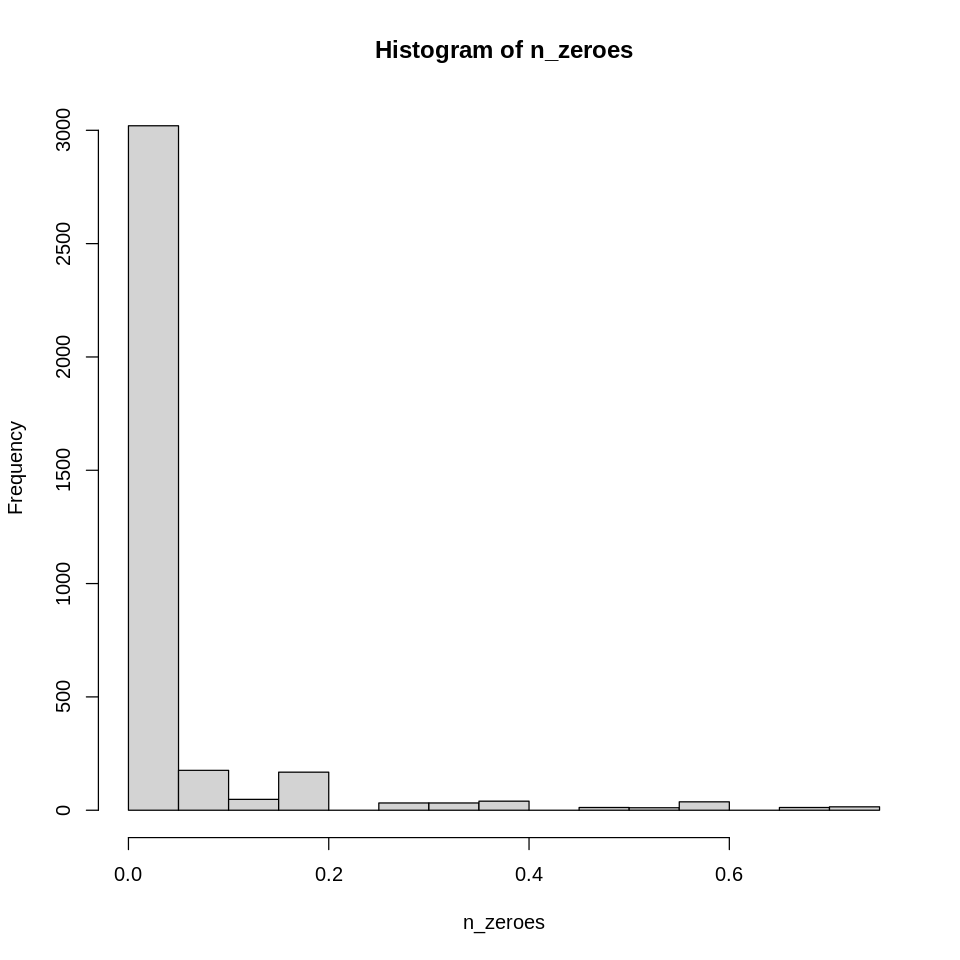

In [82]:
#calculating the proportion of missing values (Imputed values):
n_zeroes <- sapply(1:ncol(Imp_t),function(n){sum(Imp_t[,n]==452)/15}) #getting proption of zero for each feature
hist(n_zeroes)

In [83]:
sum(Imp_t==452)/(nrow(Imp_t)*ncol(Imp_t)) #sparsity calculation

[1] 0.04843186

Deselect metabolites with more than 50 % missing values. This helps to get rid of features that are present in too few samples to conduct proper statistical tests

In [139]:
#Calculate the the no.of metabolites having measurements (non-Imputed) in at least 50 % of the samples:
dim(Imp_t[,n_zeroes<0.5])
 
new_imp <- Imp_t[,n_zeroes<0.5] #Select metabolites with less than 50 % missing values.
Data <- cbind.data.frame(md_Samples,new_imp) #Combining metadata and the feature table

[1]   12 3528

In [140]:
head(Data)

,ATTRIBUTE_Sample,ATTRIBUTE_Sample_Type,ATTRIBUTE_Time-Point,1458_150.128_3.194,1418_150.128_3.173,30_151.035_0.653,7137_151.075_6.002,6905_151.075_5.937,5684_151.075_5.554,4120_151.075_5.025,⋯,16267_741.44_10.53,16931_744.42_14.322,16868_748.593_12.237,90_770.851_0.705,16880_774.609_12.932,14833_782.541_9.242,16922_810.54_14.323,86_838.838_0.705,16935_852.551_14.321,80_906.826_0.705
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep1.mzML,A15M,Sample,15,175378.06,91746.7,223716.3,89922.16,101775.16,136473.77,88457.30,⋯,6500.671,38113.37,182909.770,312315.9,32034.752,9194.219,58725.926,277251.0,452.00,188810.8
DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep2.mzML,A15M,Sample,15,63048.62,168632.8,221928.2,90066.02,104670.17,121630.62,114447.00,⋯,10640.222,42995.19,132679.780,310084.2,9962.192,6465.116,2024.846,254615.4,22432.35,163156.1
DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep3.mzML,A15M,Sample,15,35095.74,190752.2,244421.4,93198.79,107405.55,117858.12,96552.41,⋯,8933.669,45517.44,156475.440,307139.2,20559.703,9163.695,55433.645,267822.0,21419.79,163915.3
DOM_Interlab-LCMS_Lab1_A45M_Pos_MS2_rep1.mzML,A45M,Sample,45,76711.62,155348.9,216269.0,44915.14,53007.94,46253.16,47091.23,⋯,132425.420,110954.04,27574.783,356869.9,144178.120,169643.580,154162.270,305513.0,452.00,205223.6
DOM_Interlab-LCMS_Lab1_A45M_Pos_MS2_rep2.mzML,A45M,Sample,45,73032.68,179107.3,245133.7,44900.08,51043.58,44306.28,44593.39,⋯,165037.800,98800.09,5623.709,335874.0,122818.805,149711.840,2776.071,288140.5,136195.77,184923.5
DOM_Interlab-LCMS_Lab1_A45M_Pos_MS2_rep3.mzML,A45M,Sample,45,86292.55,182786.7,250871.1,37633.26,68598.52,47347.21,54438.81,⋯,164422.700,103294.92,1862.761,315125.8,82591.140,140895.100,138572.110,274124.8,92278.20,158765.9


**Run ANOVA** <br>

We now use the function aov to run the ANOVA. Since one ANOVA is being run for each metabolite feature, we run the analyses in a loop and save the output for each feature in a list called anova_out.<br>

The vector a indicates which columns in the dataset are features (i.e. from column 5 to the last column of the data frame). <br>

We can run a for loop to pass each feature column into the first argument of the aov function, while the second argument, time point, is constant.

In [141]:
anova_out=NULL
a <- 4:ncol(Data)
for (i in 1:length(a)){
  anova_out[[i]] <- aov(scale(Data[,a[i]])~as.factor(Data$'ATTRIBUTE_Time-Point'))
}

summary(anova_out[[1]]) #show the first entry in the list

                                       Df Sum Sq Mean Sq F value Pr(>F)
as.factor(Data$"ATTRIBUTE_Time-Point")  3  0.418  0.1394   0.105  0.955
Residuals                               8 10.582  1.3227               

Extract p- and F-values from anova output list: <br>
Lists of ANOVA results are not convenient when summarizing our findings. We extract the desired data from the list and summarize this in a dataframe called output_anova. <br>

The following is of interest:
*   Feature ID
*   p-value for ANOVA
*   p-value after taking multiple tests into consideration
*   F-value

In [142]:
#extract p- and F-values from ANOVA output list
output_anova <- data.frame(colnames(Data[4:ncol(Data)]))
colnames(output_anova)[1] <- "Metabolites"
output_anova["p"] <- sapply(1:length(a),function(n){summary(anova_out[[n]])[[1]][1,5]})
output_anova["p_bonferroni"] <- p.adjust(output_anova$p,method="bonferroni")
output_anova["significant"] <- ifelse(output_anova$p_bonferroni<0.05,"Significant","Nonsignificant")
output_anova["F"] <- sapply(1:length(a),function(n){summary(anova_out[[n]])[[1]][1,4]})

Now we have created a dataframe with desired results from the ANOVA. We can sort the results after the p value, using arrange, and select the top N rows using slice_head. These can be run as a sequence of operations using pipes (%>%). Are there any significant findings?

In [143]:
#Arrange the output anova list by top 20 p-values
output_anova %>% arrange (p) %>% slice_head(n=20)

Metabolites,p,p_bonferroni,significant,F
<chr>,<dbl>,<dbl>,<chr>,<dbl>
9299_191.143_6.686,6.939466e-15,2.448244e-11,Significant,11569.172
5660_218.19_5.548,2.899497e-14,1.022942e-10,Significant,8091.067
16064_684.43_10.284,5.658872e-14,1.996450e-10,Significant,6845.030
15262_329.269_9.565,5.769279e-14,2.035402e-10,Significant,6812.029
1311_233.121_2.971,6.884086e-14,2.428706e-10,Significant,6517.588
16318_688.536_10.575,2.201929e-13,7.768406e-10,Significant,4872.835
15067_677.372_9.415,2.680277e-13,9.456018e-10,Significant,4639.001
9311_244.191_6.69,2.900136e-13,1.023168e-09,Significant,4548.407
2123_212.118_3.936,6.291504e-13,2.219643e-09,Significant,3747.274


**Plot ANOVA results**

We will use ggplot to visualize results from the ANOVA, with log(F-values) on the x-axis and -log(p) on the y-axis. Features are colored after statistical significance after multiple test correction. Since there are large differences in the F- and P-values, it is easier to plot their log.

We can also display the names of some of the top features in the plot. This easily gets very cluttered if we decide to display too many names, so starting at the top 5 could be a good idea. We can select these similarly to the cell above (pipes with arrange and slice_head). Using geom_text_repel, you can make sure the labels are not overlapping)

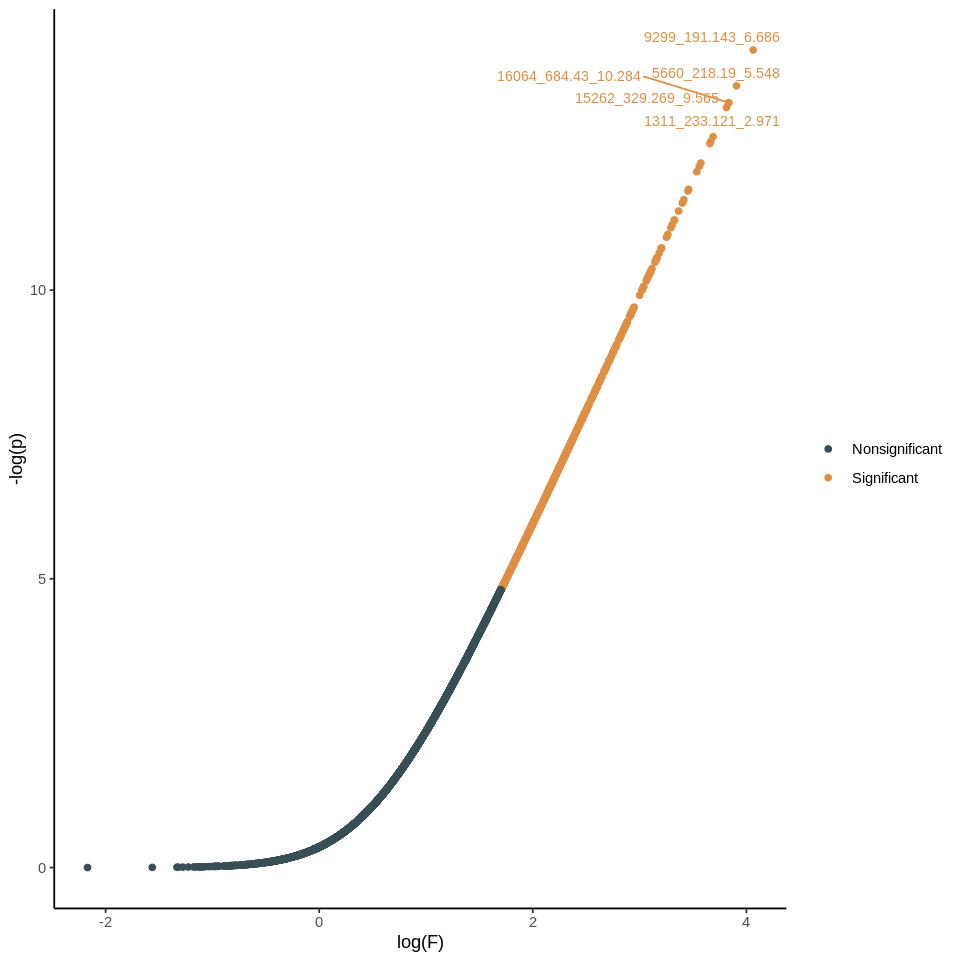

In [89]:
#plot ANOVA results
plot_anova <- ggplot(output_anova,aes(x=log(F,base=10),y=-log(p,base=10),color=significant))+ 
geom_point()+ theme_classic()+ scale_color_jama()+ ylab("-log(p)")+ xlab("log(F)")+
geom_text_repel(data=output_anova %>% arrange(p) %>% slice_head(n=5),
                  aes(label=Metabolites),size=3,show.legend = FALSE,max.overlaps = 100)+
theme(legend.title = element_blank())

plot_anova

If you want, you can also export the plots to a pdf

In [ ]:
pdf("plot_ANOVA.pdf")
plot_anova
dev.off()

In [ ]:
write.csv(output_anova,"ANOVA_results.csv")

**Calculate change from baseline and plot dilution series:**

Since ANOVA only investigates the difference in variance between and within groups, additional tests are needed to test for differences between individual time points. By selecting features that were significant in the ANOVA, we can plot the temporal trends and select individual time points that we are interested in comparing.

To simplify, we calculate the median value for each significant feature at each time point. By using group_by we group the rows by timepoint and summarize_all will calculate the median for each feature and timepoint

At this time we are interested in the features that actually change significantly with time. For this purpose we select features with "Significant" in the significant column in anova_out. This can be done using %in% and subset.

We also can divide the table according to the direction of the time trend for the features.

In [144]:
# Calculate medians for each year
timecourse_data <- Data[,4:ncol(Data)] %>% group_by(Data$'ATTRIBUTE_Time-Point') %>% summarize_all(.funs = median) 
# select only metabolites that were significant according to ANOVA
timecourse_data <- timecourse_data[,names(timecourse_data) %in% subset(output_anova,significant=="Significant")$Metabolites]

In [145]:
# Classify metabolites as increasing or decreasing with time
direction_pos <- sapply(1:ncol(timecourse_data),function(n){ifelse(timecourse_data[1,n]-timecourse_data[4,n]<0,T,F)})
timecourse_pos <- scale(timecourse_data[direction_pos])
timecourse_neg <- scale(timecourse_data[!direction_pos])

Calculate the average for each feature and time point, in order to be able to plot the trends. Error bars can be visualized by calculating the standard deviation at each time point. By subtracting time=0 from each average, we get the change in feature level.

In [146]:
#Calculate the average for each feature and time point to plot the trends
timecourse_pos_summary <- cbind.data.frame(rep(c(0,5,15,45)),
                                          rowMeans(timecourse_pos)-rowMeans(timecourse_pos)[1],
                                          rowMeans(timecourse_pos)-rowMeans(timecourse_pos)[1]+rowSds(as.matrix(timecourse_pos)),
                                          rowMeans(timecourse_pos)-rowMeans(timecourse_pos)[1]-rowSds(as.matrix(timecourse_pos)),
                                          rep("pos",nrow(timecourse_pos)))
colnames(timecourse_pos_summary) <- c("time","median","high","low","direction")

timecourse_neg_summary <- cbind.data.frame(rep(c(0,5,15,45)),
                                          rowMeans(timecourse_neg)-rowMeans(timecourse_neg)[1],
                                          rowMeans(timecourse_neg)-rowMeans(timecourse_neg)[1]+rowSds(as.matrix(timecourse_neg)),
                                          rowMeans(timecourse_neg)-rowMeans(timecourse_neg)[1]-rowSds(as.matrix(timecourse_neg)),
                                          rep("neg",nrow(timecourse_neg)))
colnames(timecourse_neg_summary) <- c("time","median","high","low","direction")

# Combine increasing and decreasing features to dataframe for plotting
timecourse_summary <- rbind(timecourse_pos_summary,timecourse_neg_summary)

Plot temporal trends in ggplot:

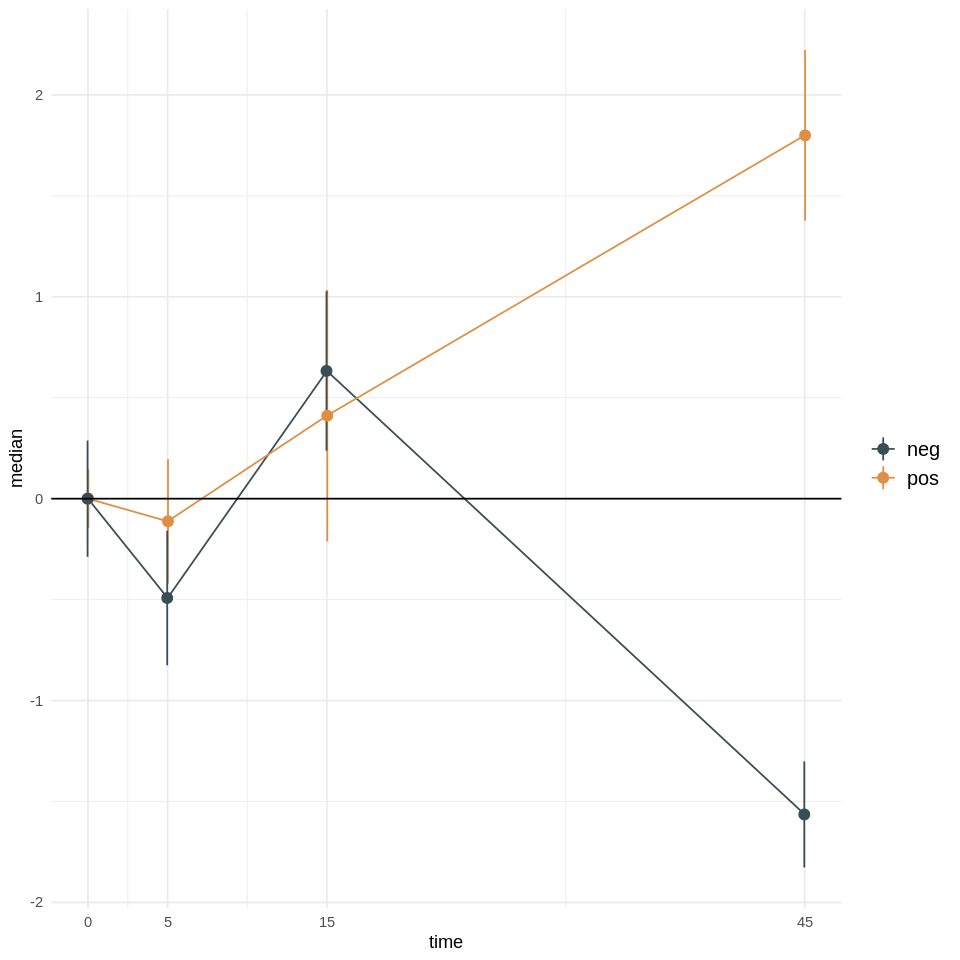

In [147]:
timecourse_plot <- ggplot(timecourse_summary,aes(x=time,y=median,max=high,min=low,color=direction,fill=direction))+
  geom_line()+ geom_pointrange(position=position_dodge(0.1))+ theme_minimal()+
  theme(legend.title = element_blank())+ geom_hline(aes(yintercept=0))+
  scale_color_jama()+scale_fill_jama()+ scale_x_continuous(breaks=c(0,5,15,45))+
  xlab("time")+ theme(legend.text=element_text(size=12))

timecourse_plot

**Tukey's post hoc test:**

Features with both positive and negative time trends exist, but differences appear to the largest between timepoint 0 and 45. Tukey's post hoc test can be used to calculate which features show statistically significant differences between these two timepoints.

The function TukeyHSD is used, which calculate these differences from the ANOVA output list previously generated. Results are stored in a new list called tukey_out

In [94]:
#Tukey_output:
tukey_out=NULL
for (i in 1:length(a)){
tukey_out[[i]] <- TukeyHSD(anova_out[[i]])
}

tukey_out[[1]]$`as.factor(Data$"ATTRIBUTE_Time-Point")` #shows the first entry of the list to show that all group wise differences are calculated.

,diff,lwr,upr,p adj
5-0,0.34449633,-2.662675,3.351668,0.9819400
15-0,0.05710194,-2.950070,3.064274,0.9999121
45-0,-0.17429376,-3.181465,2.832878,0.9975396
15-5,-0.28739439,-3.294566,2.719777,0.9892964
45-5,-0.51879008,-3.525962,2.488382,0.9432805
45-15,-0.23139569,-3.238567,2.775776,0.9943191


We extract the information we are interested in from tukey_out.(For ex: The differences between timepoint 0 and 45)

- diff - Difference in average levels between timepoint 0 and 45.
- p - p-value for group-wise difference after taking multiple group-wise comparisons into account.
- p_bonferroni - adjusted p-value after taking multiple tests (N number of features) into account
- significant - Whether the corrected p-value is below 0.05

In [148]:
#Extracting info for the tukey plot:
output_tukey <- data.frame(colnames(Data[4:ncol(Data)]))
colnames(output_tukey)[1] <- "Metabolites"
output_tukey$ID <- as.numeric(as.character(lapply(strsplit(colnames(new_imp), "_"), function(l) l[[1]])))
output_tukey["diff"] <- sapply(1:length(a),function(n){tukey_out[[n]]$`as.factor(Data$"ATTRIBUTE_Time-Point")`[3,1]})
output_tukey["p"] <- sapply(1:length(a),function(n){tukey_out[[n]]$`as.factor(Data$"ATTRIBUTE_Time-Point")`[3,4]})
output_tukey["p_bonferroni"] <- p.adjust(output_tukey$p,method="bonferroni")
output_tukey["significant"] <- ifelse(output_tukey$p_bonferroni<0.05,"Significant","Nonsignificant")
colnames(output_tukey) <- paste0("stats_",colnames(output_tukey))

In [ ]:
write.csv(output_tukey,"TukeyHSD_output.csv")

Display the top results. Any significant hits? Other impressions?

In [149]:
output_tukey %>% arrange(stats_p) %>% slice_head(n=20)

stats_Metabolites,stats_ID,stats_diff,stats_p,stats_p_bonferroni,stats_significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
9299_191.143_6.686,9299,2.264030,5.162537e-14,1.821343e-10,Significant
5660_218.19_5.548,5660,2.255903,5.162537e-14,1.821343e-10,Significant
1311_233.121_2.971,1311,2.218338,5.162537e-14,1.821343e-10,Significant
9311_244.191_6.69,9311,2.244791,5.162537e-14,1.821343e-10,Significant
15262_329.269_9.565,15262,2.215444,5.162537e-14,1.821343e-10,Significant
15067_677.372_9.415,15067,2.197153,5.162537e-14,1.821343e-10,Significant
16064_684.43_10.284,16064,2.097949,5.162537e-14,1.821343e-10,Significant
16318_688.536_10.575,16318,2.261081,5.162537e-14,1.821343e-10,Significant
3696_191.143_4.859,3696,2.265968,5.184742e-14,1.829177e-10,Significant


Create a volcano plot that displays -log(p) on the y-axis and group-difference on the x-axis. Again, display names of top findings in the plot

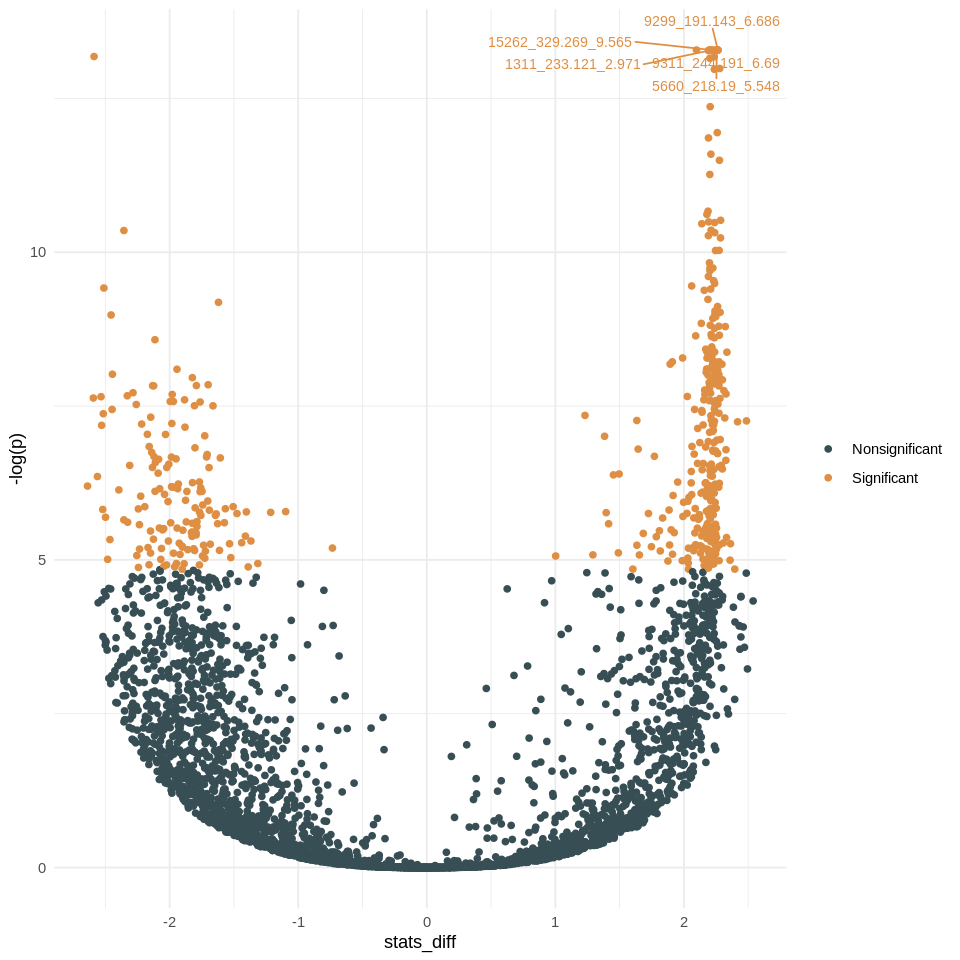

In [97]:
plot_tukey <- ggplot(output_tukey,aes(x=stats_diff,y=-log(stats_p,base=10),color=stats_significant))+ 
              geom_point()+ theme_minimal()+ scale_color_jama()+ ylab("-log(p)") +
              geom_text_repel(data=output_tukey %>% arrange(stats_p) %>% slice_head(n=5),
                aes(label=stats_Metabolites),size=3,show.legend = FALSE,max.overlaps = 100) +
              theme(legend.title = element_blank())

plot_tukey

In [ ]:
pdf("TukeyHSD_group0vsgroup45.pdf")
plot_tukey
dev.off()

As a sanity check we can check a few of the top metabolites by plotting them in a boxplot. Just change the input argument for y to match a name in the result list above.

Warning message:
“Use of `Data$"ATTRIBUTE_Time-Point"` is discouraged. Use `ATTRIBUTE_Time-Point` instead.”
Warning message:
“Use of `Data$"9299_191.143_6.686"` is discouraged. Use `9299_191.143_6.686` instead.”
Warning message:
“Use of `Data$"ATTRIBUTE_Time-Point"` is discouraged. Use `ATTRIBUTE_Time-Point` instead.”
Warning message:
“Use of `Data$"ATTRIBUTE_Time-Point"` is discouraged. Use `ATTRIBUTE_Time-Point` instead.”
Warning message:
“Use of `Data$"9299_191.143_6.686"` is discouraged. Use `9299_191.143_6.686` instead.”
Warning message:
“Use of `Data$"ATTRIBUTE_Time-Point"` is discouraged. Use `ATTRIBUTE_Time-Point` instead.”


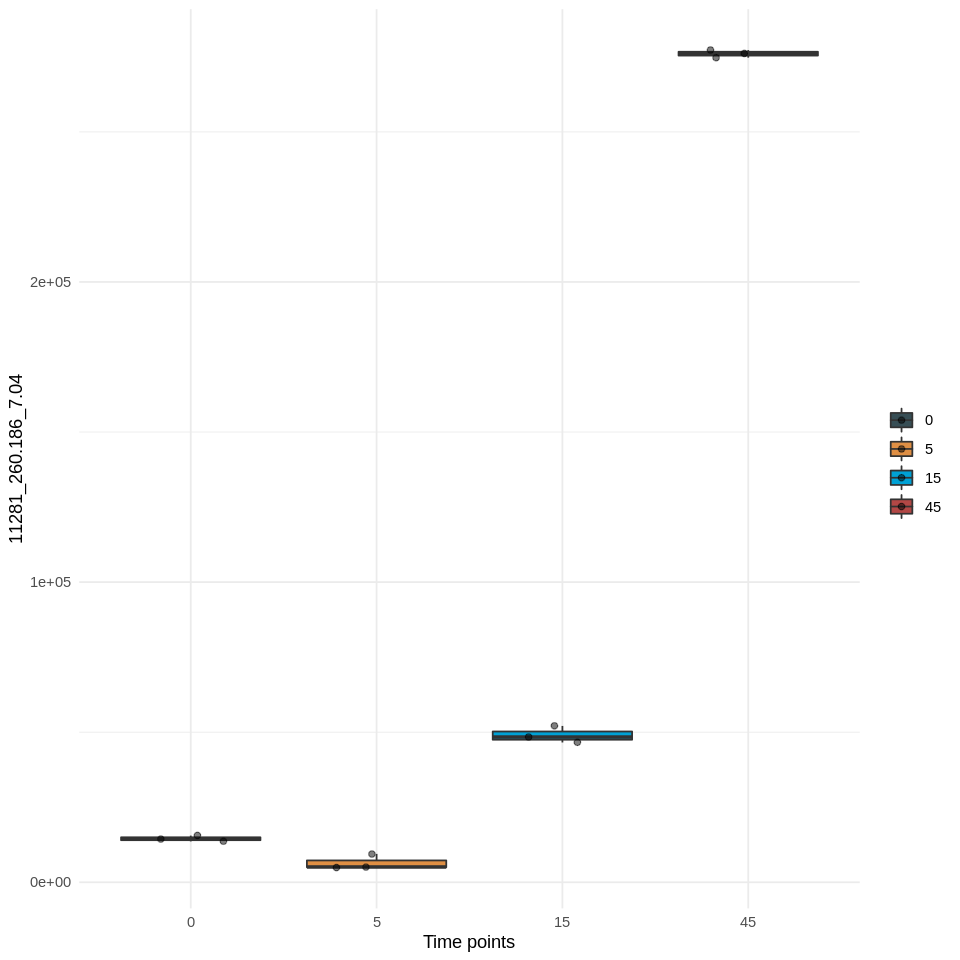

In [101]:
ggplot(Data,aes(x=as.factor(Data$'ATTRIBUTE_Time-Point'),y=Data$'9299_191.143_6.686',fill=as.factor(Data$'ATTRIBUTE_Time-Point')))+
geom_boxplot()+
geom_jitter(width=0.25, alpha=0.5)+
theme_minimal()+
scale_fill_jama()+
theme(legend.title = element_blank())+
xlab("Time points")+
ylab("11281_260.186_7.04")

# PCoA PermANOVA:

Principal coordinates analysis (PCoA)

Principal coordinates analysis (PCoA) is a metric multidimensional scaling (MDS) method that attempts to represent sample dissimilarities in a low-dimensional space. It converts a distance matrix consisting of pair-wise distances (dissimilarities) across samples into a 2- or 3-D graph (Gower, 2005). Different distance metrics can be used to calculate dissimilarities among samples (e.g. Euclidean, Canberra, Minkowski). Performing a principal coordinates analysis using the Euclidean distance metric is the same as performing a principal components analysis (PCA). The selection of the most appropriate metric depends on the nature of your data and assumptions made by the metric.

Within the metabolomics field the Euclidean, Bray-Curtis, Jaccard or Canberra distances are most commonly used. The Jaccard distance is an unweighted metric (presence/absence) whereas Euclidean, Bray-Curtis and Canberra distances take into account relative abundances (weighted). Some metrics may be better suited for very sparse data (with many zeroes) than others. For example, the Euclidean distance metric is not recommended to be used for highly sparse data.

This video tutorial by StatQuest summarizes nicely the basic principles of PCoA: https://www.youtube.com/watch?v=GEn-_dAyYME

In order to perform a PCoA as described below, it is important that the filenames in our metadata are identical as well as in the same order as the filenames in our feature table. Let's make sure this is true, using the below code (this should return TRUE).

Next, we will calculate pairwise distances across all samples in our centered data using the Euclidean distance metric

In [102]:
distm <- dist(Imp_s, method = "euclidean")# compute distance

All pairwise Euclidean distances are now stored within our distance (dissimilarity) matrix (distm). The distance matrix is then used as input for the PCoA. At first, we here color samples according to the sample types (ATTRIBUTE_Sample within our metadata)

In [103]:
PcoA <- cmdscale(distm, k = 2, eig = T, add = T)
PcoA_points <- as.data.frame(PcoA$points)
variance <- round(PcoA$eig*100/sum(PcoA$eig),1)
names(PcoA_points)[1:2] <- c('PCoA1', 'PCoA2')

head(PcoA_points)

,PCoA1,PCoA2
,<dbl>,<dbl>
DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep1.mzML,-32.76347,-24.278729
DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep2.mzML,-35.47120,-28.107875
DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep3.mzML,-36.22450,-28.779829
DOM_Interlab-LCMS_Lab1_A45M_Pos_MS2_rep1.mzML,63.82289,-8.793189
DOM_Interlab-LCMS_Lab1_A45M_Pos_MS2_rep2.mzML,63.71814,-11.127267
DOM_Interlab-LCMS_Lab1_A45M_Pos_MS2_rep3.mzML,63.56060,-8.810197


In [104]:
identical(rownames(PcoA_points), rownames(md_Samples))

[1] TRUE

Using the ggplot2 library, we can plot our PCoA using the Euclidean distance (=PCA).

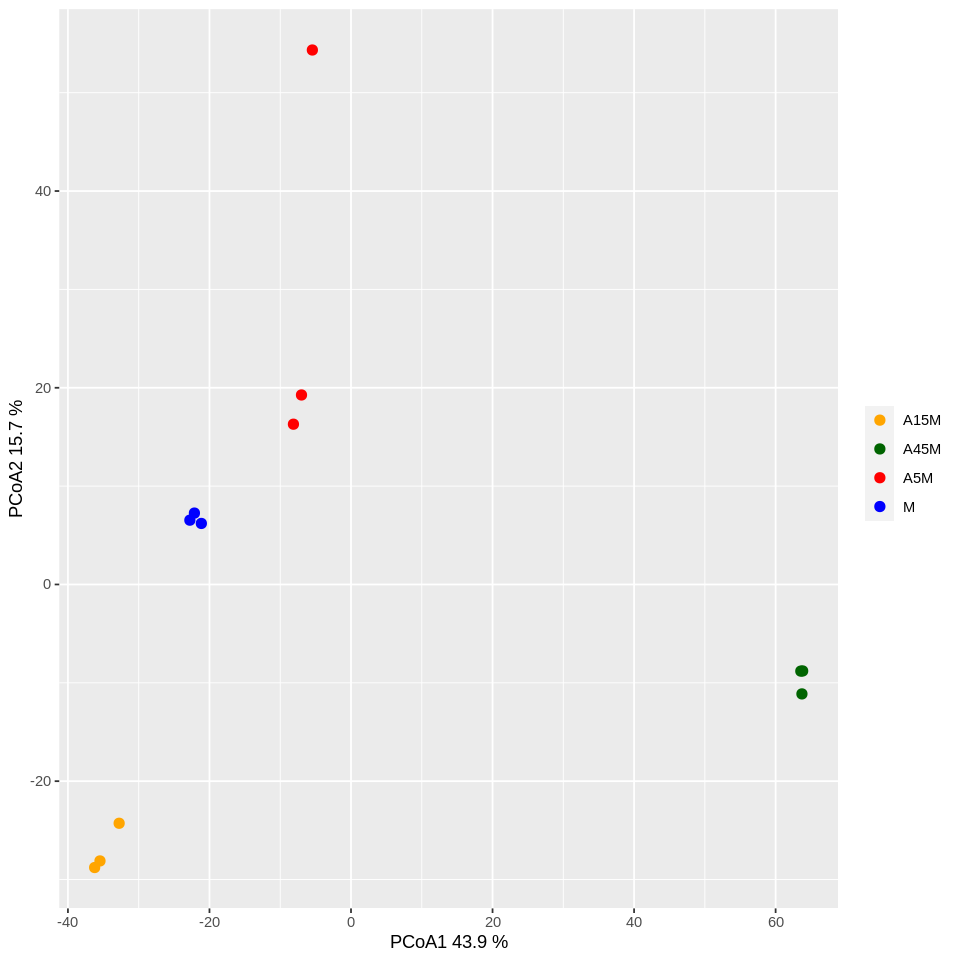

In [105]:
ggplot(PcoA_points, aes(x = PCoA1, y = PCoA2, colour = md_Samples$ATTRIBUTE_Sample, label = row.names(PcoA))) +
 geom_point(size=2.5) +
 scale_colour_manual(values = c('orange','darkgreen','red','blue','black')) +
 xlab(paste('PCoA1',variance[1],'%', sep = ' ')) +
 ylab(paste('PCoA2',variance[2],'%', sep = ' ')) +
 theme(legend.title=element_blank())

It looks like there is a strong separation between the different dilutions of the algae extract (A45, A15, A5, and M). But is the separation significant? Let's perform a permutational multivariate analysis of variance (PERMANOVA) to find out!

**Permutational multivariate analysis of variance (PERMANOVA)**

Permutational multivariate analysis of variance (PERMANOVA) is a non-parametric method for multivariate analysis of variance, where P-values are obtained using permutations. The metric was originally developed within the field of ecology (Anderson, 2008) but is today widely used in other fields, including the microbiome and metabolomics field. PERMANOVA is used to compare groups of samples and tests whether the centroid and/or the spread of the samples is different between the groups.

The adonis2() function in the vegan package can be used to perform a PERMANOVA. The input is any dissimilarity matrix and the test-statistic retrieved is a multivariate analogue to Fisher's F-ratio as well as an R2 value (Adonis R2).

In [106]:
adonres <- adonis2(distm ~ md_Samples[,colnames(md_Samples) == 'ATTRIBUTE_Sample'])
adonres

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"md_Samples[, colnames(md_Samples) == ""ATTRIBUTE_Sample""]",3,25514.86,0.6437782,4.819307,0.001
Residual,8,14118.14,0.3562218,NA,NA
Total,11,39633.00,1.0000000,NA,NA


The PERMANOVA test result tells us that there is a significant difference in the metabolomic profiles of different dilutions of algae extract (PERMANOVA, P < 0.05, Adonis R2 = 0.6437) and that app. 64% of the variation in our data can be explained by algae concentration. That means that algal blooms could possibly be monitored using untargeted metabolomics

Perform PCoA and assess separation using PERMANOVA

To speed up the analysis and so we don't have to rewrite the entire code when testing different parameters, we can define a function, which will perform a principal coordinates analysis (PCoA) using a distance metric of choice, calculate a PERMANOVA and plot results in a 2-D graph:

In [107]:
plotPCoA <- function(ft, md, distmetric = c("euclidean", "maximum", "manhattan", "canberra", "binary", 
                                                  "minkowski"), collow = "#810f7c", colhigh ="#f7fcb9", 
                      catper = "plate", catcols = "plate", mdtype = 'categorical', 
                      cols = c('grey','black','orange','pink','darkgreen','darkred','brown','blue','skyblue3','green'),
                      title = 'Principal coordinates plot'){
    
    catper <<- catper
    distm <- dist(ft, method = distmetric)
    d <- as.matrix(distm)

    if (length(which(is.na(md[,colnames(md) == catper]))) !=0){
          red <- as.dist(as.matrix(distm)[-which(is.na(md[,colnames(md) == catper])),-which(is.na(md[,colnames(md) == catper]))])
          adonres <- adonis2(red ~ na.omit(md[,colnames(md) == catper]))
          Rsq <- adonres$R2[1]
          pval <- adonres$'Pr(>F)'[1]
        } else {
          adonres <- adonis2(distm ~ md[,colnames(md) == catper])
          Rsq <- adonres$R2[1]
          pval <- adonres$'Pr(>F)'[1]
        }

    PcoA <- cmdscale(distm, k =2, eig = T, add = T)
    PcoA_points <- as.data.frame(PcoA$points)
    variance <- round(PcoA$eig*100/sum(PcoA$eig),1)
    names(PcoA_points)[1:2] <- c('PCoA1', 'PCoA2')
    PcoA_points <- as.data.frame(PcoA_points)
    PcoA_points$Group <- md[,colnames(md) == catcols][match(rownames(PcoA_points),rownames(md))]
    names(PcoA_points)[1:2] <- c('PCoA1', 'PCoA2')
    
    # plot
    cbPalette <- cols

    if (mdtype == 'continuous'){
          Tr_PcoA <- ggplot(PcoA_points, aes(x = PCoA1, y = PCoA2, colour = Group, label = row.names(PcoA))) + geom_point(size=2.5) +
            scale_colour_gradient(low = collow, high = colhigh,space = "Lab", na.value = "grey50", guide = "colourbar",aesthetics = "colour")+
            theme(legend.title=element_blank()) +
            xlab(paste('PCoA1',variance[1],'%', sep = ' ')) +
            ylab(paste('PCoA2',variance[2],'%', sep = ' ')) +
            ggtitle(paste(title,paste0("(p=",round(pval,4),","),paste0("adonis-R2=",round(Rsq,4),")"),sep=" "))

        } else {

          Tr_PcoA <- ggplot(PcoA_points, aes(x = PCoA1, y = PCoA2, colour = Group, label = row.names(PcoA))) + geom_point(size=2.5) +
            scale_colour_manual(values = cbPalette) +
            theme(legend.title=element_blank()) +
            xlab(paste('PCoA1',variance[1],'%', sep = ' ')) +
            ylab(paste('PCoA2',variance[2],'%', sep = ' ')) +
            ggtitle(paste(title,paste0("(p=",round(pval,4),","),paste0("adonis-R2=",round(Rsq,4),")"),sep=" "))
        }
    
    print(Tr_PcoA)
}

By defining different parameters within the plotPCoA function:

- **distmetric:** A distance metric of your choice, including "euclidean", "maximum", "manhattan", "canberra", "binary" or "minkowski".
- **catper:** How should the samples be grouped for PERMANOVA, this can be any column name of your metadata.
- **catcols:** According to what groups should the samples be colored on the PCoA, this can be any column name of your metadata.
mdtype: Either 'categorical' or 'continuous', this value defines whether a continuous or categorical color scale should be used for the PCoA.
- **cols:** Colors used for plotting the groups in the PCoA. The length of this object should be equal to the number of groups plotted.
- **title:** Any title of your choice you want to give the plot.<br>

we can quickly draw the same PCoA plot as above and retrieve PERMANOVA test results at the same time.

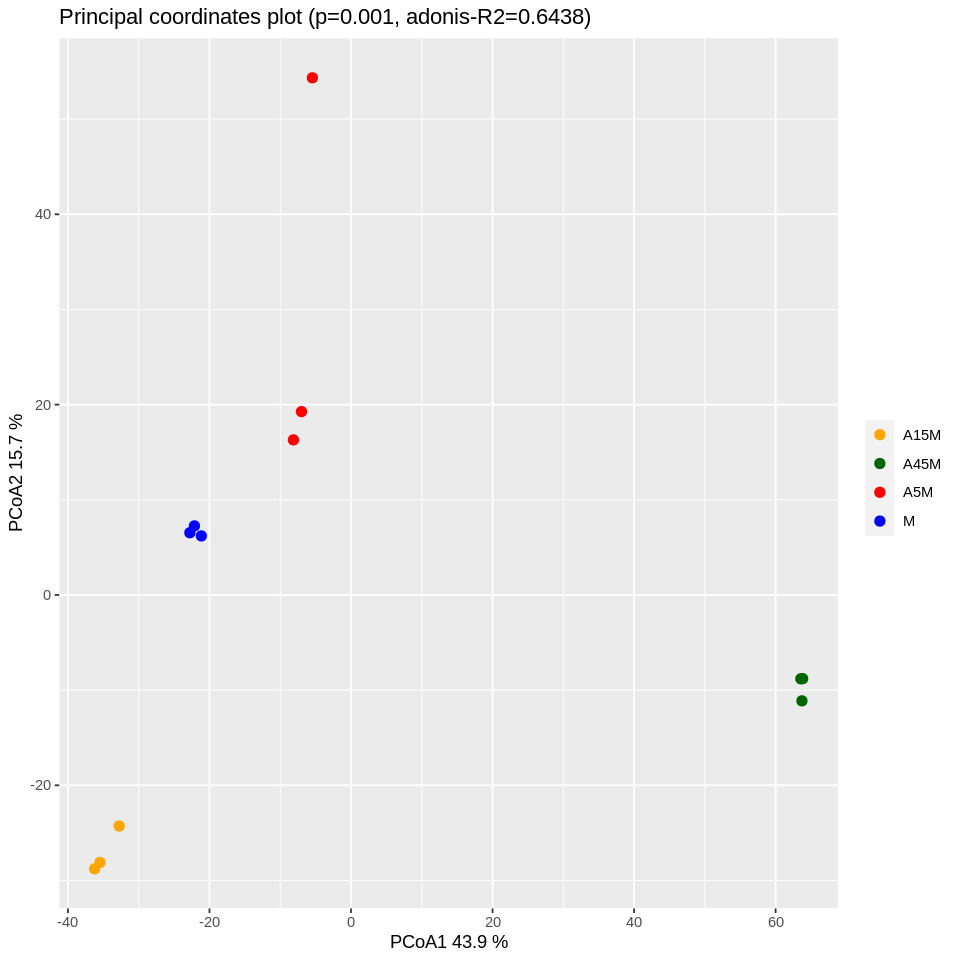

In [109]:
plotPCoA(Imp_s, md_Samples, distmetric = "euclidean", catper = "ATTRIBUTE_Sample", catcols = "ATTRIBUTE_Sample", mdtype = 'categorical', 
                      cols = c('orange','darkgreen','red','blue','black'),
                      title = 'Principal coordinates plot')

By changing input variables of the function we just created, we can now also quickly investigate what happens if we, for example treat algae concentration as continuous data?

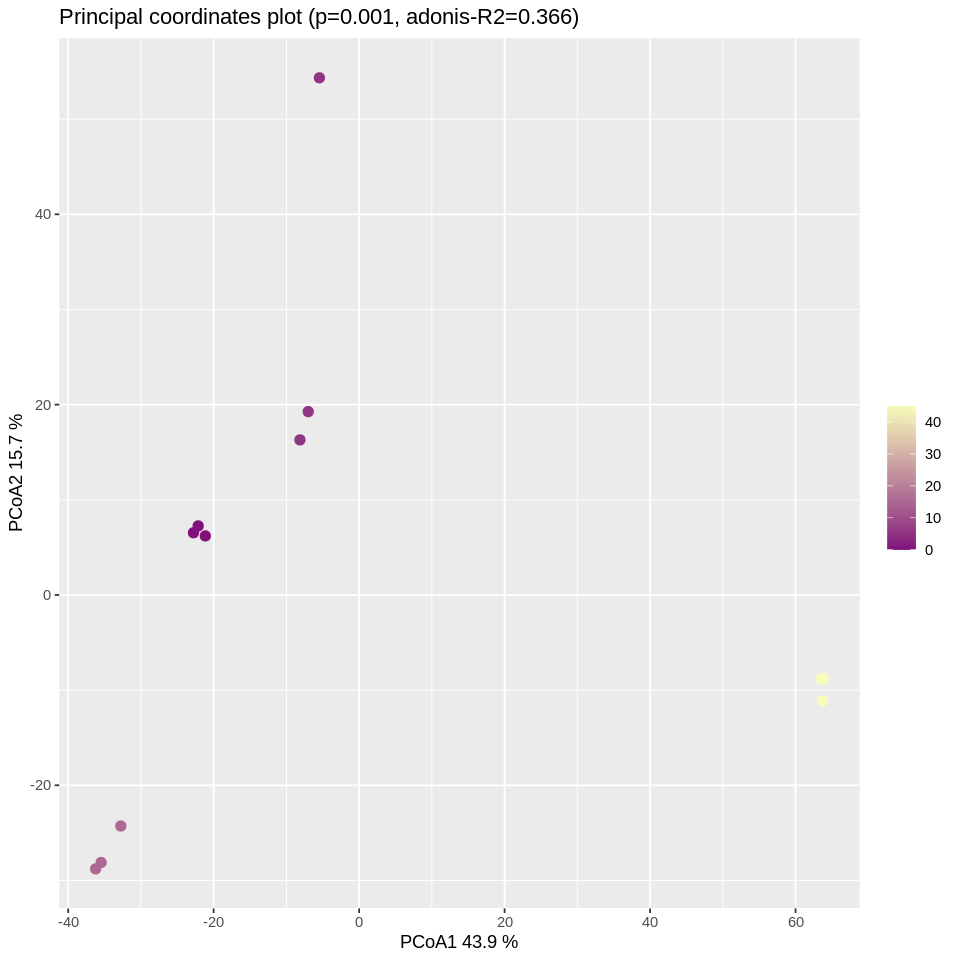

In [111]:
plotPCoA(Imp_s, md_Samples, distmetric = "euclidean", catper = "ATTRIBUTE_Time-Point", catcols = "ATTRIBUTE_Time-Point", mdtype = 'continuous', 
                      title = 'Principal coordinates plot')

The PCoA plot looks the same, the only difference is that we can now visualize the pseudo temporal trend (algae concentration) using a color gradient. The PERMANOVA result slightly changes if we treat algae concentration as continuous rather than categorical variable. Metabolomic profiles of different algae dilutions are still significantly different but the variation in the data that can be explained by algae concentration is a lot lower, 36% (PERMANOVA, P < 0.05, Adonis R2 = 0.366).

- We can also test a different distance metric and look at the separation of samples. During data cleanup we replaced all zero values with the minimum value found in our feature table. We might want to opt not to impute any values but instead use a distance metric that can deal better with missing values (e.g. Canberra).

First, we replace all imputed values in the feature table with NA

In [113]:
ft_nonimp <- Imp_t
ft_nonimp[ft_nonimp == min(ft_nonimp)] <- NA #replacing the imputed values to NA
fts_nonimp <- scale(ft_nonimp, scale = TRUE, center = TRUE) #scaling and centering
(sum(is.na(ft_nonimp))*100)/(dim(ft)[1]*dim(ft)[2]) # shows the amount of missing values in percentage

[1] 2.08147

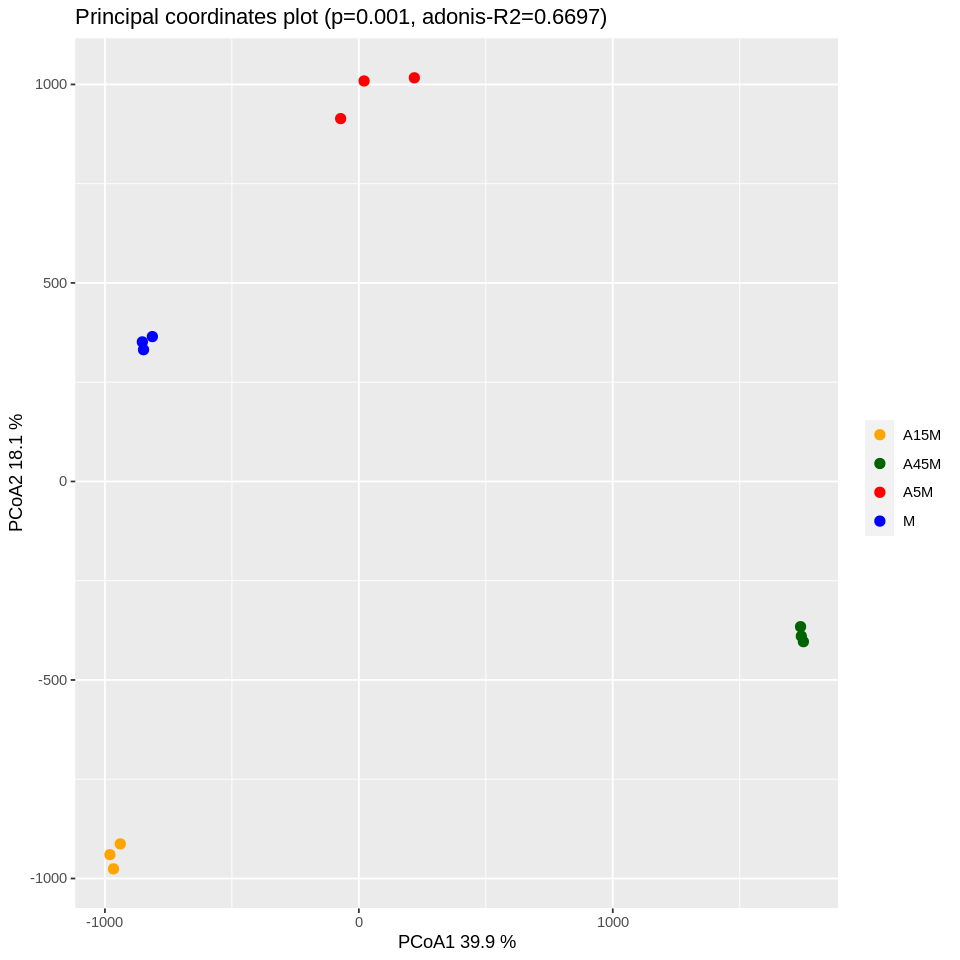

In [114]:
plotPCoA(fts_nonimp, md_Samples, distmetric = "canberra", catper = "ATTRIBUTE_Sample", catcols = "ATTRIBUTE_Sample", mdtype = 'categorical', 
                      cols = c('orange','darkgreen','red','blue','black'),
                      title = 'Principal coordinates plot')

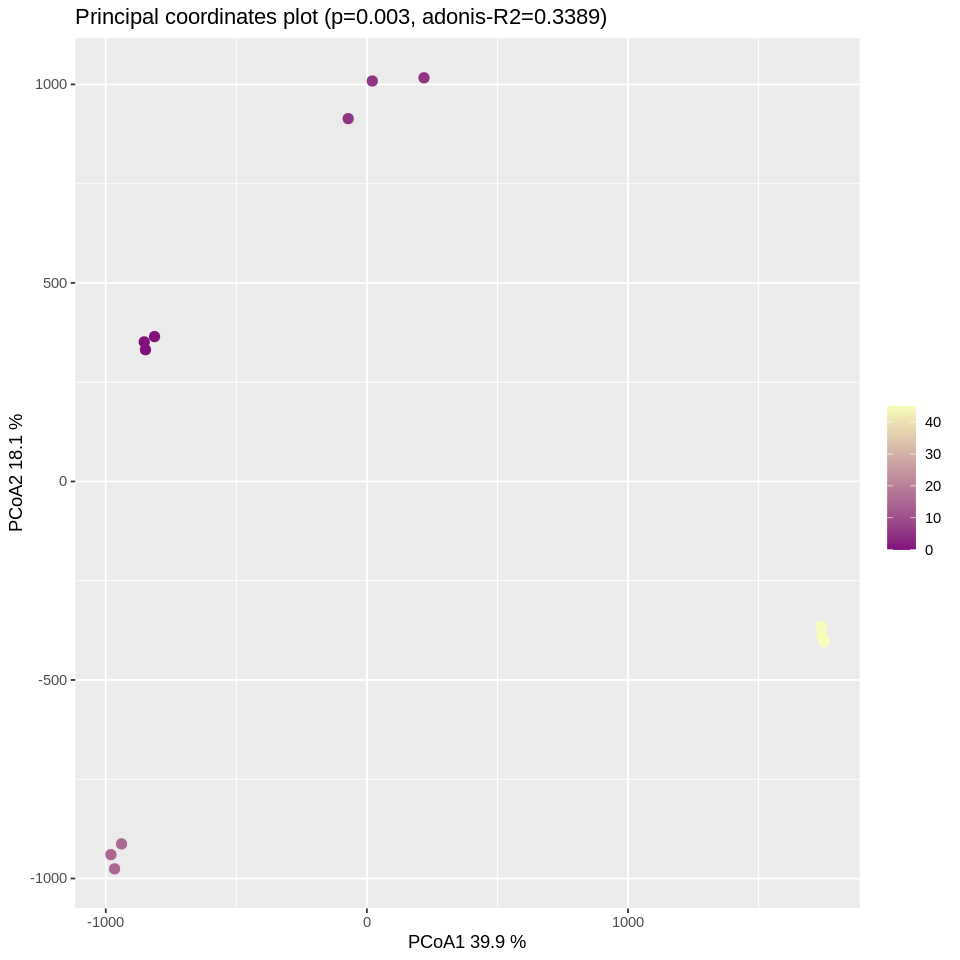

In [115]:
plotPCoA(fts_nonimp, md_Samples, distmetric = "canberra", catper = "ATTRIBUTE_Time-Point", catcols = "ATTRIBUTE_Time-Point", mdtype = 'continuous', 
                      title = 'Principal coordinates plot')

Using the Canberra distance metric, we also see a significant difference in the metabolomic profiles of different algae dilutions (PERMANOVA, P < 0.05, Adonis R2 = 0.6697 and 0.3389 respectively) with app. 67% and 34% of the variation in our data explained by algae concentration.

Lastly, let's also test a binary metric, the Jaccard metric. When we apply the Jaccard metric we need to work with the non-imputed, non-scaled feature table, where all missing values need to be converted to 0s. A positive value will be interpreted as 1 (present) and missing values as 0 (absent).

In [116]:
ft_nonimp_0 <- ft_nonimp
ft_nonimp_0[is.na(ft_nonimp_0)] <- 0

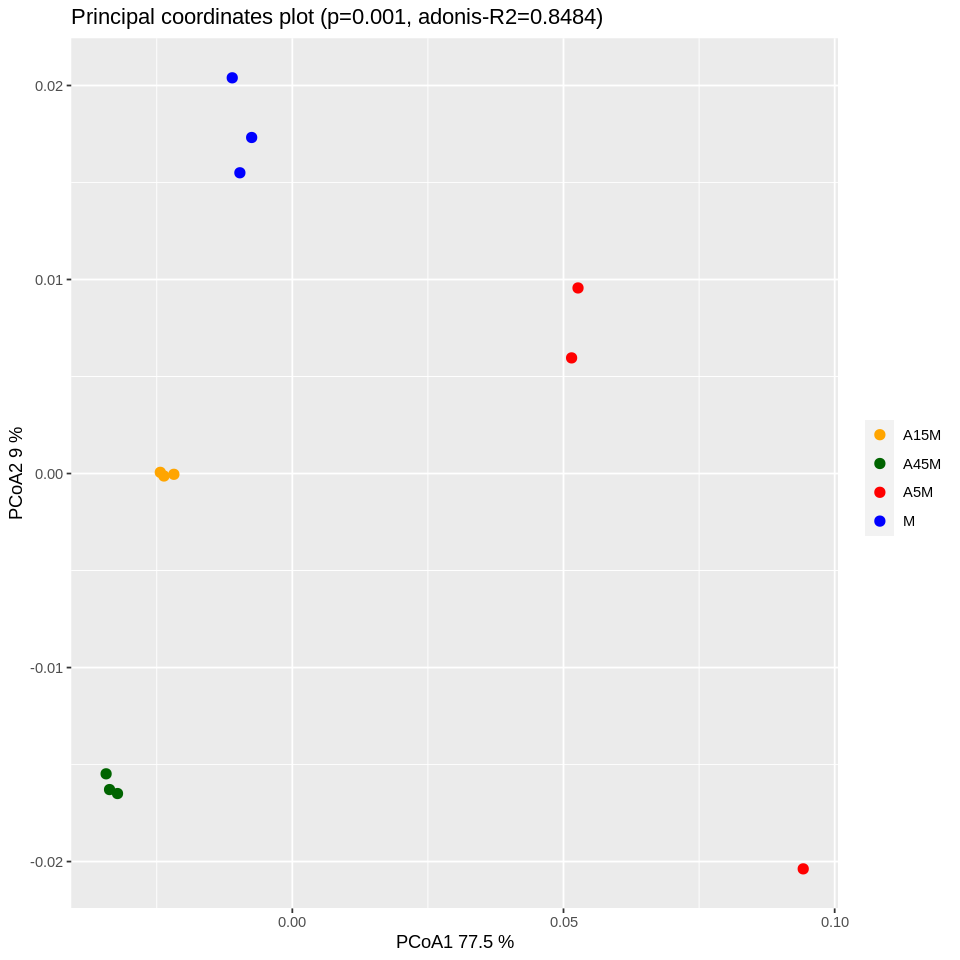

In [117]:
plotPCoA(ft_nonimp_0, md_Samples, distmetric = "binary", catper = "ATTRIBUTE_Sample", catcols = "ATTRIBUTE_Sample", mdtype = 'categorical', 
                      cols = c('orange','darkgreen','red','blue','black'),
                      title = 'Principal coordinates plot')

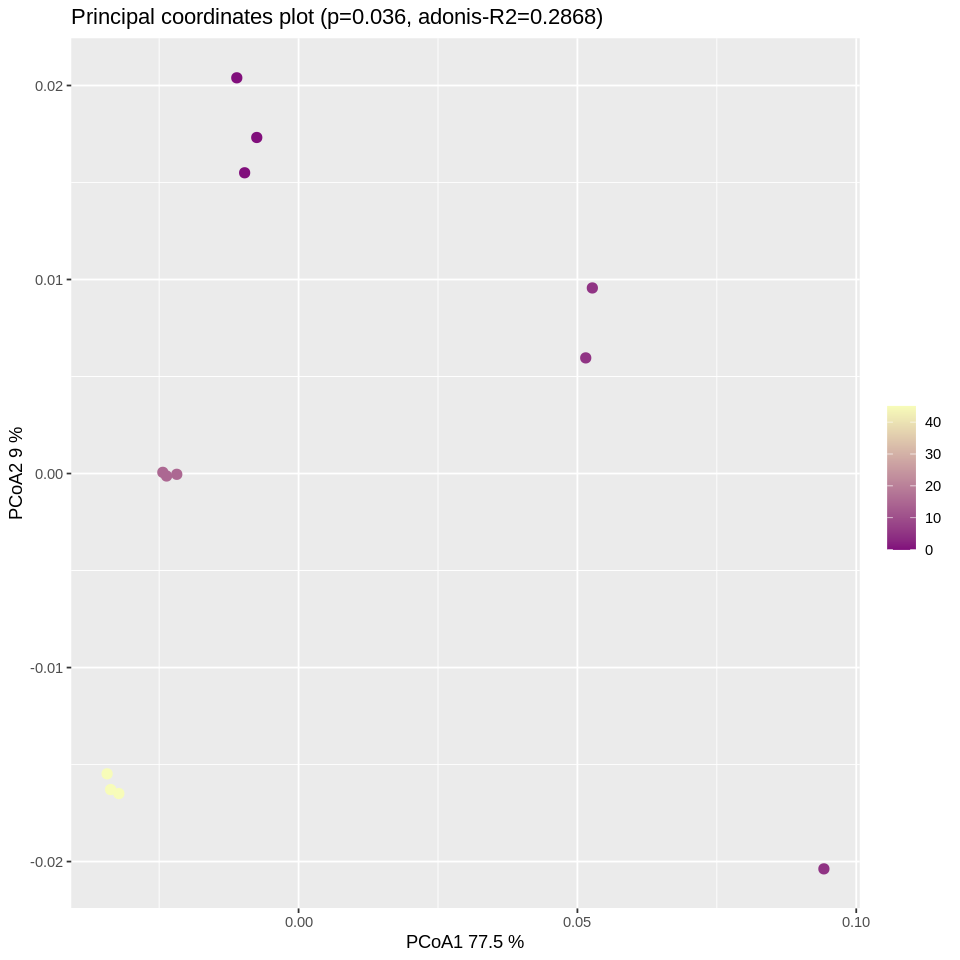

In [118]:
plotPCoA(ft_nonimp_0, md_Samples, distmetric = "binary", catper = "ATTRIBUTE_Time-Point", catcols = "ATTRIBUTE_Time-Point", mdtype = 'continuous', 
                      title = 'Principal coordinates plot')

Using the Jaccard distance metric, we also see a significant difference in the metabolomic profiles algae dilutions (PERMANOVA, P < 0.05, Adonis R2 = 0.8484 and 0.2868 respectively) with app. 85% and 29% of the variation in our data explained by algae concentration.

# Hierarchial Clustering Algorithm:

We are now ready to perform a cluter analysis. The concept behind hierarchical clustering is to repeatedly combine the two nearest clusters into a larger cluster.

The first step consists of calculating the distance between every pair of observation points and stores it in a matrix;
1. It puts every point in its own cluster;
2. It merges the closest pairs of points according to their distances;
3. It recomputes the distance between the new cluster and the old ones and stores them in a new distance matrix;
4. It repeats steps 2 and 3 until all the clusters are merged into one single cluster. <br>

Next, we perform the hierarchical clustering. As you can see in the following code we need to specify the 'method' argument. This argument tells the algorithm how to measure the distance between clusters and it's usually referred as 'Linkage Method'. There are several and you can explore different options here https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/hclust. Usually, you will try different ones and plot the result.

Here, we use the default 'complete' (i.e. complete-linkage), which calculates the maximum distance between clusters before merging.

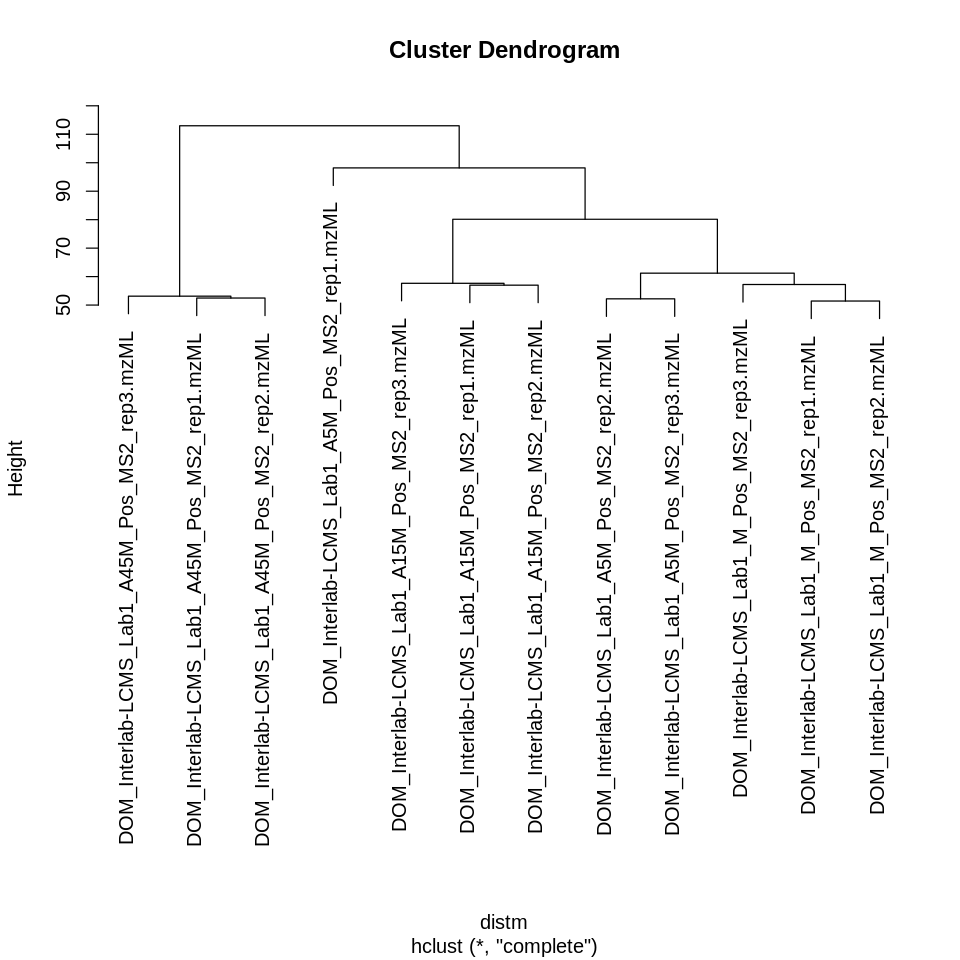

In [119]:
set.seed(1234) # Setting a seed for reproducing the same result
hclust_res <- hclust(distm, method = 'complete')
plot(hclust_res) #visualize the cluster relationships in a tree-like diagram called dendrogram

In the above dendogram, the distance of split or merge is given as the y axis 'height'. You can also cut the dendrogram to create the desired number of clusters. In this case, it seems we have 3 main 'splits', further divided into a total of 4 clusters. We are going to use the cutree() function for this https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/cutree.

In [120]:
cut_res <- cutree(hclust_res, k = 3) # where k indicates the number of clusters we want
# the cluster assignment
data.frame(cut_res)

,cut_res
,<int>
DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep1.mzML,1
DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep2.mzML,1
DOM_Interlab-LCMS_Lab1_A15M_Pos_MS2_rep3.mzML,1
DOM_Interlab-LCMS_Lab1_A45M_Pos_MS2_rep1.mzML,2
DOM_Interlab-LCMS_Lab1_A45M_Pos_MS2_rep2.mzML,2
DOM_Interlab-LCMS_Lab1_A45M_Pos_MS2_rep3.mzML,2
DOM_Interlab-LCMS_Lab1_A5M_Pos_MS2_rep1.mzML,3
DOM_Interlab-LCMS_Lab1_A5M_Pos_MS2_rep2.mzML,1
DOM_Interlab-LCMS_Lab1_A5M_Pos_MS2_rep3.mzML,1


In [121]:
# counting the number of samples present in each cluster
table(data.frame(cut_res))

cut_res
1 2 3 
8 3 1 

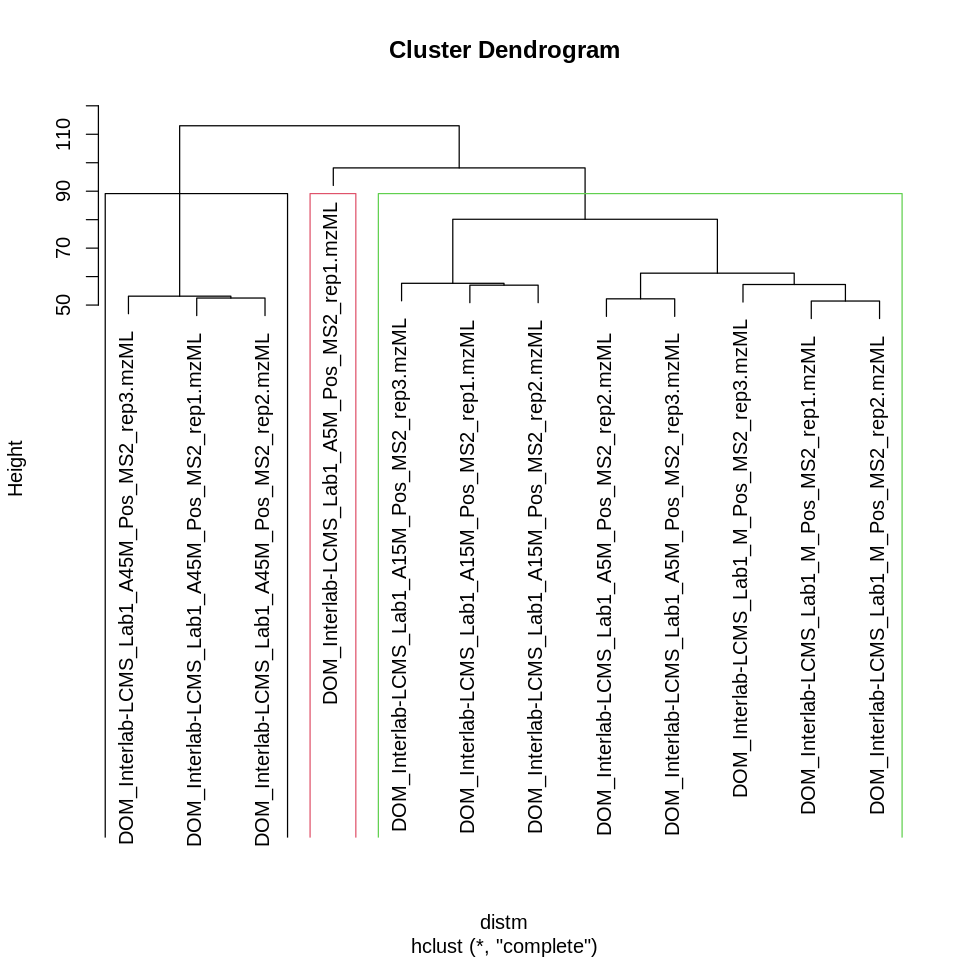

In [122]:
# highlight the clusters in the dendrogram by coloring their borders.
plot(hclust_res)
rect.hclust(hclust_res, k = 3, border = 1:3)

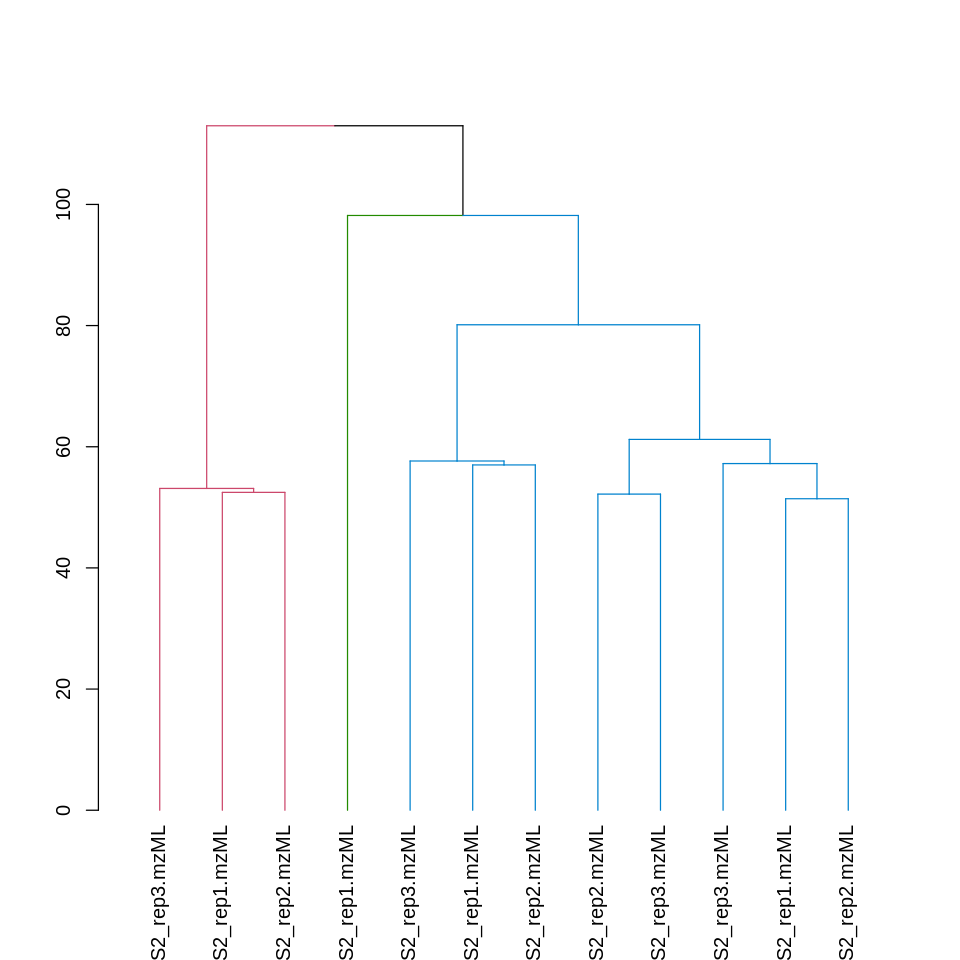

In [123]:
# Coloring the entire clusters with different colors
dend_obj <- as.dendrogram(hclust_res)
col_dend <- color_branches(dend_obj, k = 3)
plot(col_dend)

**Can we define the number of clusters using a simple approach? We are going to use the NbClust and factoextra packages for this purpose.**

We start with the Elbow approach. The Elbow method looks at the total within-cluster sum of square (WSS) as a function of the number of clusters. WSS: sum of distances between the points and the corresponding centroids for each cluster.

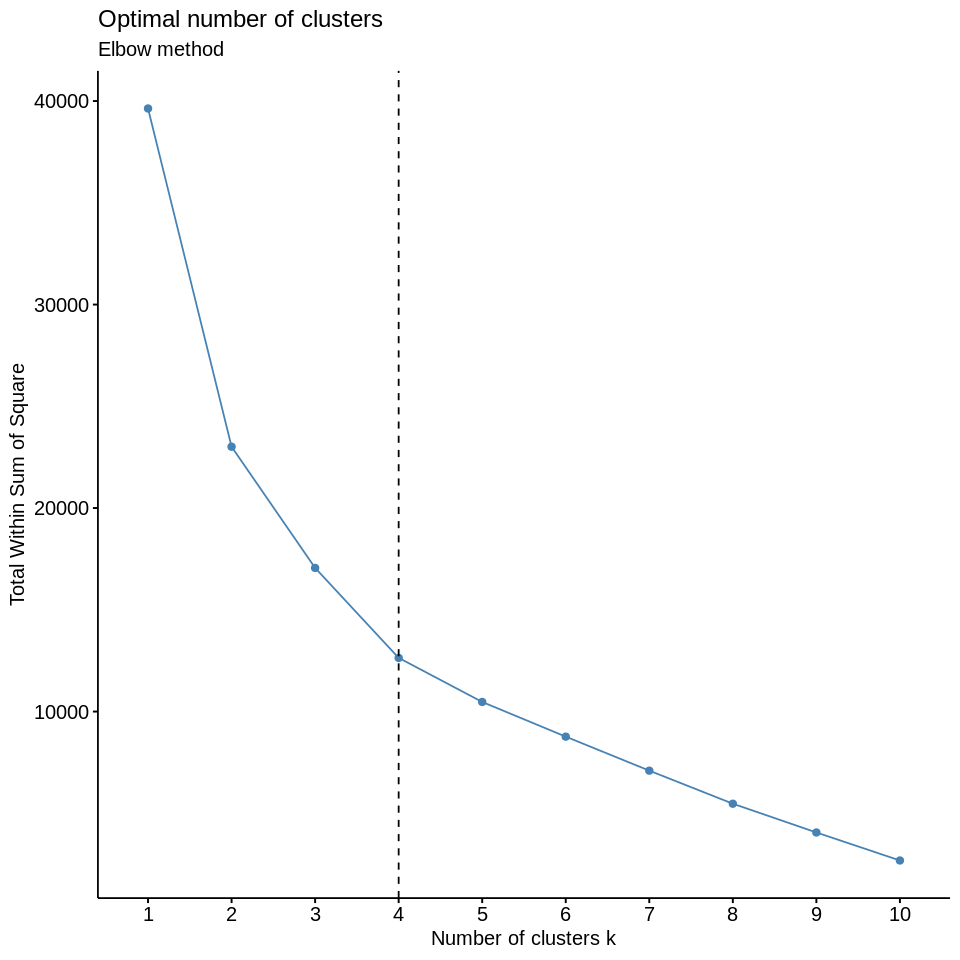

In [127]:
# Elbow method. Here we use 'hcut' which computes the hierarchical clustering and cut the tree.
fviz_nbclust(Imp_s, hcut, method = "wss") +
  geom_vline(xintercept = 4, linetype = 2) + # add line indicating what you think is the optimal number of clusters
  labs(subtitle = "Elbow method") # add subtitle

The location of a 'elbow' in the plot is usually considered as an indicator of the appropriate number of clusters because it means that adding another cluster does not improve the grouping. This method seems to suggest 4 clusters. However, the Elbow method is sometimes ambiguous. As we can see from the plot above, the 'elbow' could be located at 3 or 4 clusters.
An alternative is the average silhouette method. The Silhouette method measures the quality of a clustering and determines how well each point lies within its cluster.

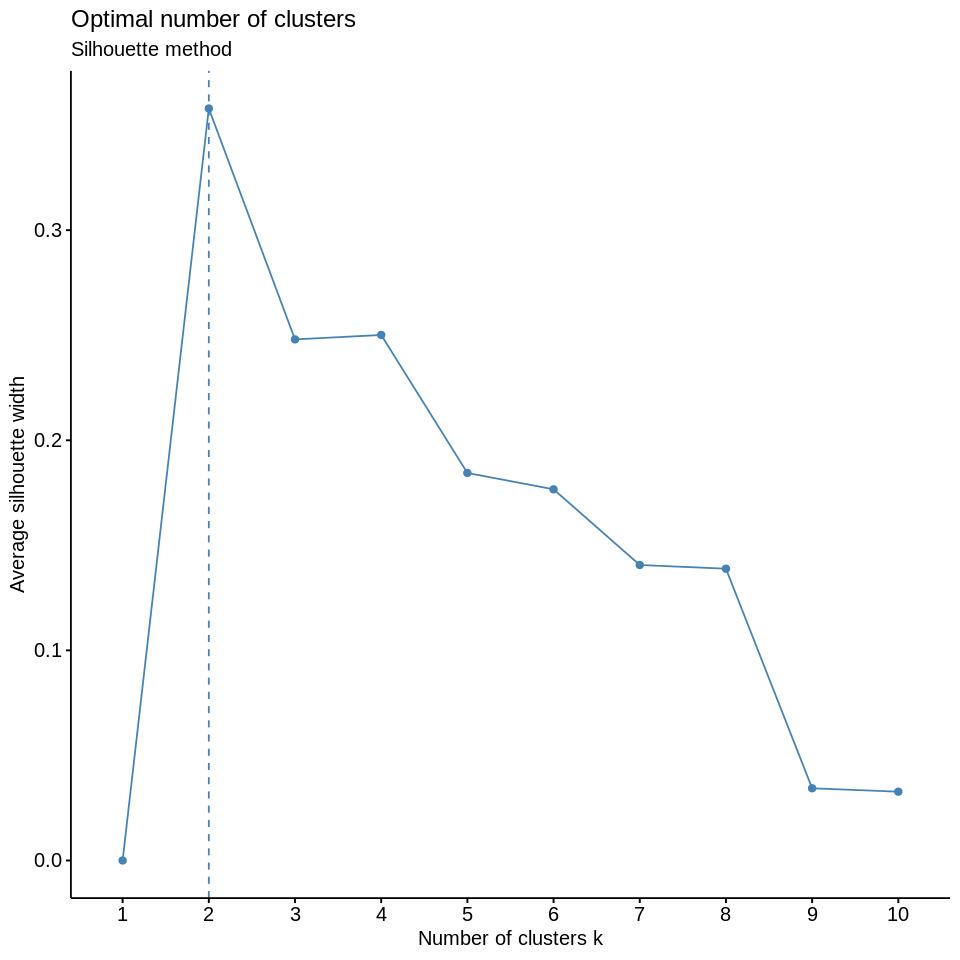

In [129]:
# Silhouette method
fviz_nbclust(Imp_s, hcut, method = "silhouette") + labs(subtitle = "Silhouette method")

In this case, the silouette method seems to find 2 main clusters. There are several other methods to discover the optimal number of clusters and sometimes they do not fully agree. Often, you will need to bring your own knowledge about the specific field to decide whether the number of clusters makes sense.

As you can see, no matter which approach we use for finding the optimal number of clusters, the hierarchical clustering was able to identify meaningful clusters. However, based on the parameters that we have selected it seems that sample types 'M' and 'A5M' cluster together. Is this meaningful?

Sometimes, you may get unexpected results that are not only related to the selection of parameters but also to the input data. For instance, noisy data will lead to different clusters and interpretation of the results. For example, you could consider to remove features having zero-variance or zero Median Absolute Deviation prior to perform any further downstream analysis (remember that we usually impute quite a lot of data in metabolomics and this could create this zero-variance issue).

In [130]:
# To remove features having zero Median Absolute Deviation:use the following function 
#(just replace 'mad' with 'var' for the variance)
removeZeroMad <- function(df){
  df[, sapply(df, mad) != 0]
}

In [132]:
# we apply the function to the input data before scaling
Imp_noZeroMad <- removeZeroMad(as.data.frame(Imp_t))
dim(Imp_t)
dim(Imp_noZeroMad)

[1]   12 3603

[1]   12 3516

As you can see, some features were removed after this filtering step. What happens if we perform clustering again?

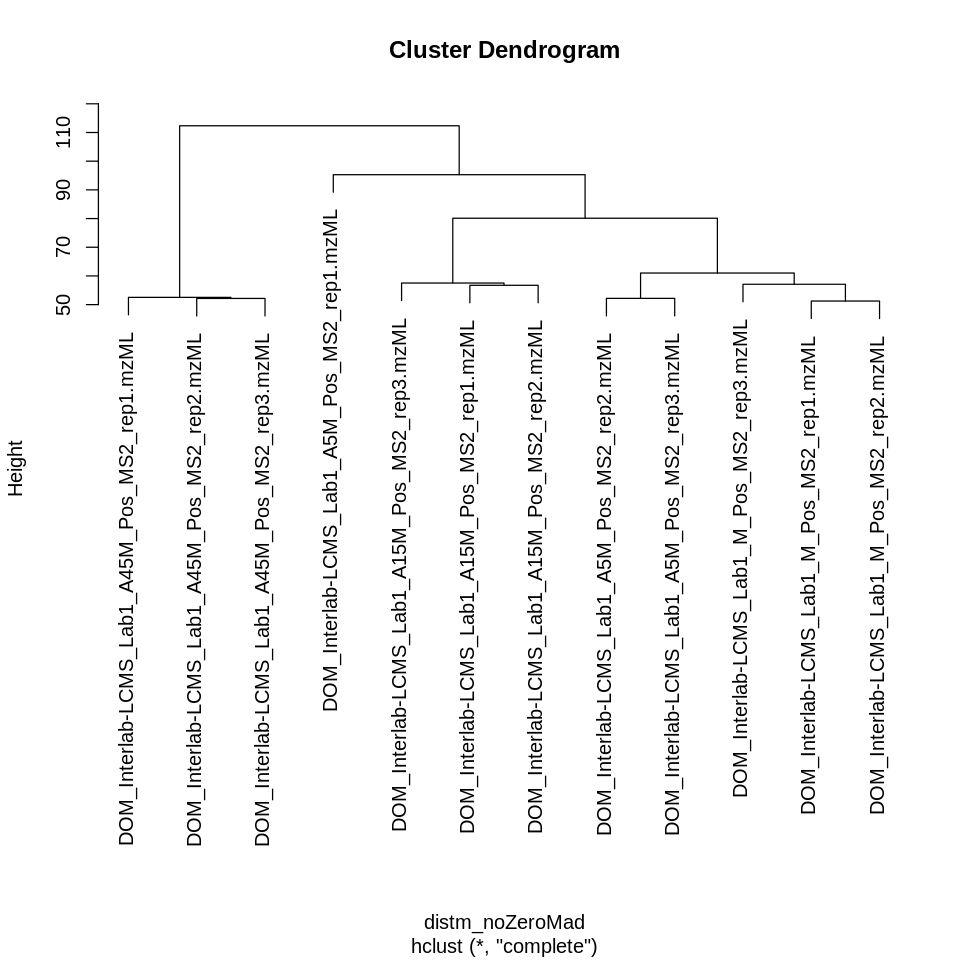

In [133]:
# first, we scale the matrix
Imp_noZeroMad_s <- scale(Imp_noZeroMad, scale = T, center = T)
# then we calculate the distance matrix
distm_noZeroMad <- dist(Imp_noZeroMad_s, method = "euclidean")
# then we perform clustering
set.seed(1234)
hclust_noZeroMad <- hclust(distm_noZeroMad, method = 'complete')
# finally, we plot the result
plot(hclust_noZeroMad)

In this case, the result is not affected and 'M' and 'A5M' samples still cluster together. This is also a nice proof that the noisy features that we have removed might not contribute much to the clustering and the interpretation of the result is still the same. Therefore, 'M' and 'A5M' samples share clear metabolic similarities. (*About one of the A5M samples clustering separate?*)

# Heatmaps:
In the next section we will add an additional layer in our visualization by plotting a heatmap together with the hierarchical clustering.

First, we prepare the 'decoration' for our heatmap. We want to show the 'ATTRIBUTE_Sample' and 'ATTRIBUTE_Time-Point' colored in a distinctive way. It is much easier to read the heatmap in this way.

We are going to use the ComplexHeatmap package https://jokergoo.github.io/ComplexHeatmap/reference/Heatmap.html

In [151]:
# metadata of interests are ATTRIBUTE: Timepoint and Samples
InsideLevels(md_Samples)

INDEX,ATTRIBUTES,LEVELS,COUNT,ATTRIBUTE_CLASS
<int>,<chr>,<chr>,<chr>,<chr>
1,ATTRIBUTE_Sample,"A15M, A45M, A5M, M","3, 3, 3, 3",character
2,ATTRIBUTE_Sample_Type,Sample,12,character
3,ATTRIBUTE_Time-Point,"0, 5, 15, 45","3, 3, 3, 3",integer


In [152]:
# create a dataframe with just the metadata of interest
ann <- data.frame(md_Samples$`ATTRIBUTE_Sample`, md_Samples$`ATTRIBUTE_Time-Point`)
# assign better column names to the dataframe
colnames(ann) <- c('Sample', 'Time_point')
# select some colors of your choice. Explore more colors using the RColorBrewer package or by simply check for the hex code https://www.color-hex.com/
colours <- list('Sample' = c('M' = 'grey', 'A5M' = 'darkorange', 'A15M' = 'darkred', 'A45M' = 'darkgreen'),
  'Time_point' = c('0' = 'grey', '5' = 'darkorange', '15' = 'darkred', '45' = 'darkgreen'))
  
# the function in ComplexHeatmap for preparing the annotation object 
colAnn <- HeatmapAnnotation(df = ann,col = colours,annotation_width = unit(c(1, 4), 'cm'),gap = unit(1, 'mm'))

ComplexHeatmap gives you a flexible function and it is easy to change parameters. You can take a look at the options here https://jokergoo.github.io/ComplexHeatmap/reference/Heatmap.html

In the following, we will perform hierarchical clustering based on Euclidean distance. ComplexHeatmap uses the R package hclust for this purpose, that we already saw in the previous section. As we said, Euclidean distance is just an example that fits well continuous numerical values in your dataset but there are several distance measures such as Manhattan, Minkowski, Canberra etc.
If you have binary data, you may consider to use Jaccard distance.

In [153]:
# set the parameters for the type of clustering to perform. You can play with different options
set.seed(1234)
hmap <- Heatmap(
  t(Imp_s),
  heatmap_legend_param = list(title = "Scaled/centered\nintensity"), 
  col = c("blue","white","darkred"),
  show_row_names = FALSE,show_column_names = FALSE,
  cluster_rows = TRUE,cluster_columns = TRUE,
  show_column_dend = TRUE,show_row_dend = TRUE,
  row_dend_reorder = TRUE,column_dend_reorder = TRUE,
  clustering_distance_rows = "euclidean",clustering_distance_columns = "euclidean",
  clustering_method_rows = "complete",clustering_method_columns = "complete",
  width = unit(100, "mm"),
  top_annotation = colAnn)

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



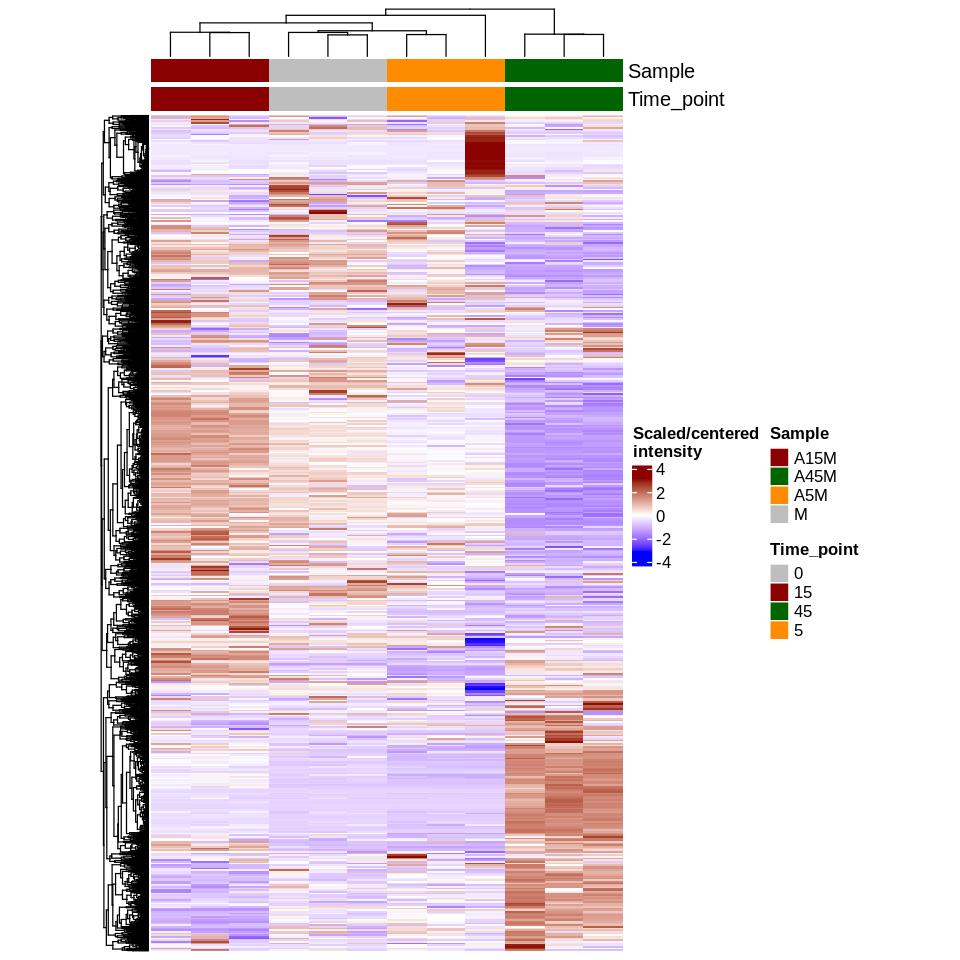

In [154]:
# draw heatmap. It can take some time if your input data is quite large
draw(hmap, heatmap_legend_side="right", annotation_legend_side="right")

As we can see, by using this type of visualization we can clearly observe the similarities between samples and features, in particular we can see again that sample types 'M' and 'A5M' are quite similar. We can also apply a method for dividing the heatmap according to a cluster assignment, similarly to the cutree() step, for generating better visualizations that can help the interpretation of the results.

ComplexHeatmap contains a function to find clusters by using another clustering algorithm called k-means.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



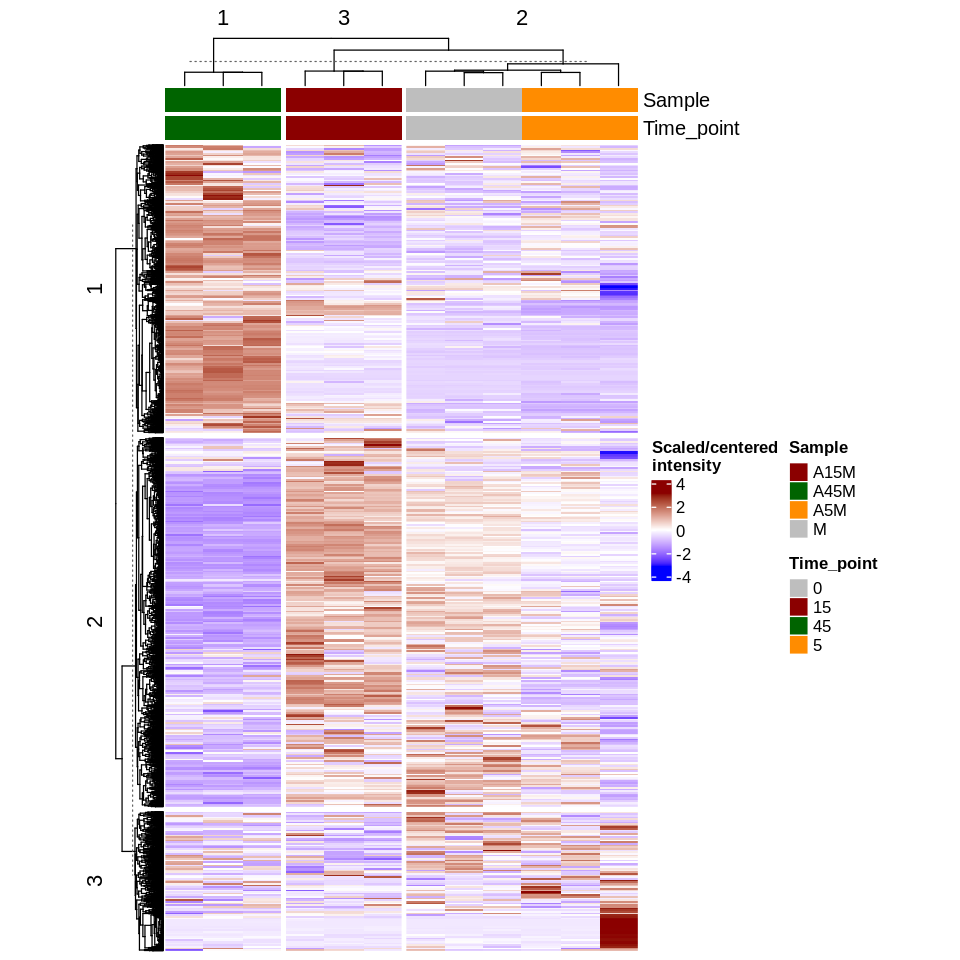

In [155]:
# set the parameters for the type of clustering to perform. You can play with different options
set.seed(1234)
hmap_km <- Heatmap(
  t(Imp_s),
  heatmap_legend_param = list(title = "Scaled/centered\nintensity"), 
  col = c("blue","white","darkred"),
  show_row_names = FALSE,show_column_names = FALSE,
  cluster_rows = TRUE,cluster_columns = TRUE,
  show_row_dend = TRUE,show_column_dend = TRUE,
  row_dend_reorder = TRUE,column_dend_reorder = TRUE,
  clustering_distance_rows = "euclidean",clustering_distance_columns = "euclidean",
  clustering_method_rows = "complete",clustering_method_columns = "complete",
  width = unit(100, "mm"),
  top_annotation = colAnn,
  # Parameters to perform k-means clustering:  
  row_km = 3, row_km_repeats = 100, #row_km indicates the no.of clusters you want in the rows
  column_km = 3, column_km_repeats = 100) #column_km refers to the no.of clusters you want in the columns

# draw heatmap. It can take some time if your input data is quite large
draw(hmap_km, heatmap_legend_side="right", annotation_legend_side="right")

In the next step, we extract the features belonging to the clusters for future use.

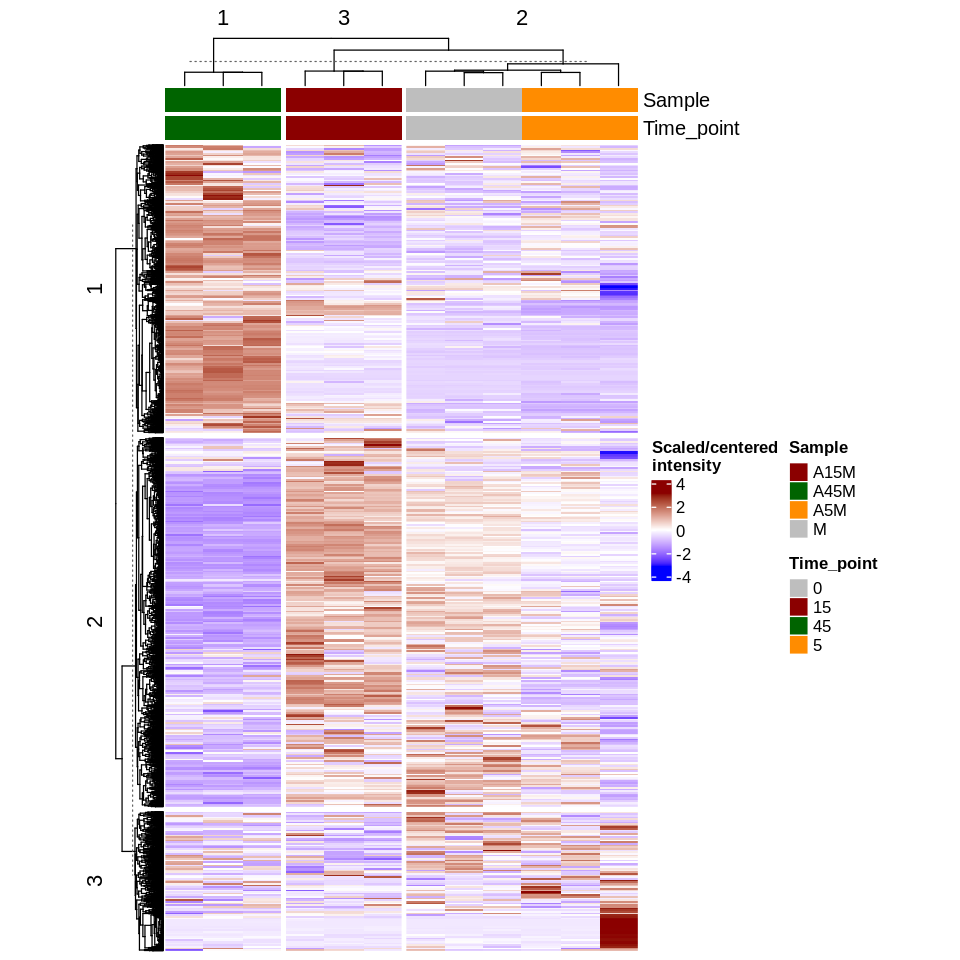

In [156]:
row_order_res <- row_order(draw(hmap_km, heatmap_legend_side="right", annotation_legend_side="right"))  

In [157]:
# check/confirm size of clusters
lapply(row_order_res, function(x) length(x))

$`1`
[1] 1303

$`2`
[1] 1670

$`3`
[1] 630

In [162]:
# loop to extract features for each cluster
out_res <- NULL
for (i in seq_along(row_order_res)){
out_res[[i]] <- cbind(colnames(Imp_s[,row_order_res[[i]]]), paste("cluster", i, sep=""))  
}

out_res <- as.data.frame(do.call(rbind, out_res)) #getting the list elements into a dataframe
colnames(out_res) <- c('feature','cluster')
dim(out_res) # dimension of the object
table(out_res$cluster) # number of features in each cluster
head(out_res)

# save the data frame with cluster information
write.csv(out_res, file.path(fName,'feature_clusters.csv'),row.names =F, sep='\t')

[1] 3603    2


cluster1 cluster2 cluster3 
    1303     1670      630 

,feature,cluster
,<chr>,<chr>
1,14562_249.185_9.075,cluster1
2,3280_230.139_4.677,cluster1
3,14665_244.227_9.145,cluster1
4,293_285.145_0.792,cluster1
5,14548_313.237_9.06,cluster1
6,6270_274.165_5.742,cluster1


Warning message in write.csv(out_res, file.path(fName, "feature_clusters.csv"), :
“attempt to set 'sep' ignored”


In [165]:
# save the heatmap in svg format.The plot can be imported & modified  in Illustrator or similar program.
svglite(filename=paste0(fName,'/heatmap.svg'), width=10, height=8, bg='white')
draw(hmap_km, heatmap_legend_side="right", annotation_legend_side="right")
dev.off()

png 
  2

## Getting output files from Google Colab:
<a id="colab_output"></a>
For Google Collab users, we can zip the result folder which contains all the output files using the next cell and download the zip file directly from the folder "/content/My_TestData" into the local system.

In [ ]:
#Only for Google Colab
#utils::zip(zipfile = 'TestData_Workflow_Results', files = "/content/My_TestData_Workflow_Results/")